# **Project III** | **Music & Mental Health**

In [155]:
# manejo bbdd
import pandas as pd
import numpy as np
import datetime

#gráficas
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#estadística
import math
from scipy.stats import norm
from scipy import stats #para box-cox entre otros
from scipy.stats import skew

#preprocesamiento
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer, OneHotEncoder
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

#modelos y evaluación
from sklearn.model_selection import train_test_split
from scipy.stats import chi2_contingency
from sklearn import linear_model
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from prophet import Prophet

#warnings
import warnings
warnings.filterwarnings("ignore")

import os

In [3]:
data=pd.read_csv("Data/music.csv")
data.head(3)

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

In [5]:
data.sample()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
653,9/13/2022 9:29,22.0,Spotify,4.0,Yes,No,No,Rock,Yes,No,...,Rarely,Rarely,Very frequently,Very frequently,10.0,7.0,4.0,4.0,Improve,I understand.


In [6]:
data.shape

(736, 33)

In [7]:
data.describe()

,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD
count,735.000000,736.000000,6.290000e+02,736.000000,736.000000,736.000000,736.000000
mean,25.206803,3.572758,1.589948e+06,5.837636,4.796196,3.738451,2.637228
std,12.054970,3.028199,3.987261e+07,2.793054,3.028870,3.088689,2.842017
min,10.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,18.000000,2.000000,1.000000e+02,4.000000,2.000000,1.000000,0.000000
50%,21.000000,3.000000,1.200000e+02,6.000000,5.000000,3.000000,2.000000
75%,28.000000,5.000000,1.440000e+02,8.000000,7.000000,6.000000,5.000000
max,89.000000,24.000000,1.000000e+09,10.000000,10.000000,10.000000,10.000000


In [8]:
data.columns

Index(['Timestamp', 'Age', 'Primary streaming service', 'Hours per day',
       'While working', 'Instrumentalist', 'Composer', 'Fav genre',
       'Exploratory', 'Foreign languages', 'BPM', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects',
       'Permissions'],
      dtype='object')

Cambiemos el formato de los títulos de las columnas siguiendo el PEP-8

In [9]:
data.columns=[col.lower().replace(' ', '_') for col in data.columns]
data.columns

Index(['timestamp', 'age', 'primary_streaming_service', 'hours_per_day',
       'while_working', 'instrumentalist', 'composer', 'fav_genre',
       'exploratory', 'foreign_languages', 'bpm', 'frequency_[classical]',
       'frequency_[country]', 'frequency_[edm]', 'frequency_[folk]',
       'frequency_[gospel]', 'frequency_[hip_hop]', 'frequency_[jazz]',
       'frequency_[k_pop]', 'frequency_[latin]', 'frequency_[lofi]',
       'frequency_[metal]', 'frequency_[pop]', 'frequency_[r&b]',
       'frequency_[rap]', 'frequency_[rock]', 'frequency_[video_game_music]',
       'anxiety', 'depression', 'insomnia', 'ocd', 'music_effects',
       'permissions'],
      dtype='object')

In [10]:
data.sample()

,timestamp,age,primary_streaming_service,hours_per_day,while_working,instrumentalist,composer,fav_genre,exploratory,foreign_languages,...,frequency_[r&b],frequency_[rap],frequency_[rock],frequency_[video_game_music],anxiety,depression,insomnia,ocd,music_effects,permissions
102,8/28/2022 15:32,17.0,Apple Music,5.0,Yes,No,No,Metal,Yes,No,...,Sometimes,Sometimes,Very frequently,Rarely,10.0,8.0,6.0,7.0,No effect,I understand.


## Nulos & Duplicados

In [11]:
data.isna().sum()

timestamp                         0
age                               1
primary_streaming_service         1
hours_per_day                     0
while_working                     3
instrumentalist                   4
composer                          1
fav_genre                         0
exploratory                       0
foreign_languages                 4
bpm                             107
frequency_[classical]             0
frequency_[country]               0
frequency_[edm]                   0
frequency_[folk]                  0
frequency_[gospel]                0
frequency_[hip_hop]               0
frequency_[jazz]                  0
frequency_[k_pop]                 0
frequency_[latin]                 0
frequency_[lofi]                  0
frequency_[metal]                 0
frequency_[pop]                   0
frequency_[r&b]                   0
frequency_[rap]                   0
frequency_[rock]                  0
frequency_[video_game_music]      0
anxiety                     

In [12]:
sum(data.isna().sum())

129

Nulos en porcentajes

In [13]:
from functions import calculate_null_percentage  #El código esta en el functions.py
calculate_null_percentage(data)

bpm                             14.5
music_effects                    1.1
instrumentalist                  0.5
foreign_languages                0.5
while_working                    0.4
primary_streaming_service        0.1
composer                         0.1
age                              0.1
frequency_[video_game_music]     0.0
frequency_[pop]                  0.0
frequency_[r&b]                  0.0
frequency_[rap]                  0.0
frequency_[rock]                 0.0
timestamp                        0.0
anxiety                          0.0
depression                       0.0
frequency_[lofi]                 0.0
insomnia                         0.0
ocd                              0.0
frequency_[metal]                0.0
frequency_[hip_hop]              0.0
frequency_[latin]                0.0
frequency_[k_pop]                0.0
frequency_[jazz]                 0.0
frequency_[gospel]               0.0
frequency_[folk]                 0.0
frequency_[edm]                  0.0
f

Como hay 106 nulos en 'bpm', se decide imputarlos. Veamos como es su distribución

In [14]:
data.columns

Index(['timestamp', 'age', 'primary_streaming_service', 'hours_per_day',
       'while_working', 'instrumentalist', 'composer', 'fav_genre',
       'exploratory', 'foreign_languages', 'bpm', 'frequency_[classical]',
       'frequency_[country]', 'frequency_[edm]', 'frequency_[folk]',
       'frequency_[gospel]', 'frequency_[hip_hop]', 'frequency_[jazz]',
       'frequency_[k_pop]', 'frequency_[latin]', 'frequency_[lofi]',
       'frequency_[metal]', 'frequency_[pop]', 'frequency_[r&b]',
       'frequency_[rap]', 'frequency_[rock]', 'frequency_[video_game_music]',
       'anxiety', 'depression', 'insomnia', 'ocd', 'music_effects',
       'permissions'],
      dtype='object')

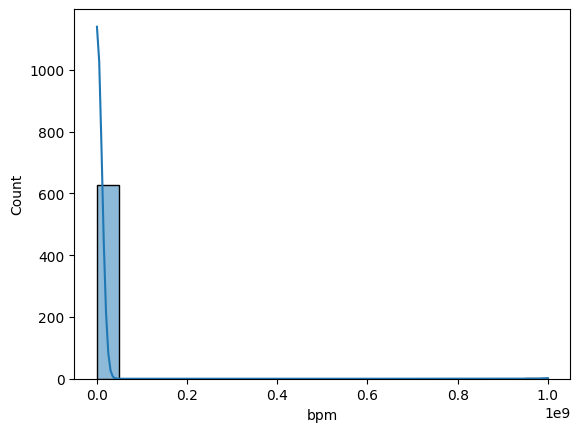

In [15]:
sns.histplot(data['bpm'], bins=20, kde=True)
plt.savefig("Images/bpm.png")
plt.show()

Se puede ver que la distribución está bastante skewed, por lo que se decide imputar con la mediana. Pero primero estudiemos
con un poco más de detalle los valores de 'bpm

In [16]:
data.bpm.value_counts()
#Se puede ver que hay varios valores con frecuencia=1

bpm
120.0    45
140.0    25
150.0    18
110.0    16
105.0    15
         ..
181.0     1
106.0     1
191.0     1
40.0      1
168.0     1
Name: count, Length: 135, dtype: int64

In [17]:
count=data['bpm'].value_counts()[data['bpm'].value_counts() == 1]
count

bpm
204.0          1
999999999.0    1
153.0          1
82.0           1
131.0          1
192.0          1
159.0          1
186.0          1
63.0           1
68.0           1
56.0           1
8.0            1
624.0          1
218.0          1
166.0          1
4.0            1
173.0          1
183.0          1
142.0          1
167.0          1
175.0          1
189.0          1
193.0          1
179.0          1
61.0           1
190.0          1
164.0          1
52.0           1
139.0          1
62.0           1
208.0          1
20.0           1
181.0          1
106.0          1
191.0          1
40.0           1
168.0          1
Name: count, dtype: int64

In [18]:
sum(count)

37

Hay 37 valores en 'bpm' que solo aparecen una vez, lo cual es coherente según la gráfica. Casi todos estos valores son los que terminan siendo
los outliers

In [19]:
data['bpm'].fillna(data['bpm'].median(), inplace=True)

In [20]:
data.dtypes

timestamp                        object
age                             float64
primary_streaming_service        object
hours_per_day                   float64
while_working                    object
instrumentalist                  object
composer                         object
fav_genre                        object
exploratory                      object
foreign_languages                object
bpm                             float64
frequency_[classical]            object
frequency_[country]              object
frequency_[edm]                  object
frequency_[folk]                 object
frequency_[gospel]               object
frequency_[hip_hop]              object
frequency_[jazz]                 object
frequency_[k_pop]                object
frequency_[latin]                object
frequency_[lofi]                 object
frequency_[metal]                object
frequency_[pop]                  object
frequency_[r&b]                  object
frequency_[rap]                  object


Veamos si hay duplicados

In [21]:
duplicates=data[data.duplicated()]
duplicates
#No hay duplicados

,timestamp,age,primary_streaming_service,hours_per_day,while_working,instrumentalist,composer,fav_genre,exploratory,foreign_languages,...,frequency_[r&b],frequency_[rap],frequency_[rock],frequency_[video_game_music],anxiety,depression,insomnia,ocd,music_effects,permissions


In [22]:
data.dtypes

timestamp                        object
age                             float64
primary_streaming_service        object
hours_per_day                   float64
while_working                    object
instrumentalist                  object
composer                         object
fav_genre                        object
exploratory                      object
foreign_languages                object
bpm                             float64
frequency_[classical]            object
frequency_[country]              object
frequency_[edm]                  object
frequency_[folk]                 object
frequency_[gospel]               object
frequency_[hip_hop]              object
frequency_[jazz]                 object
frequency_[k_pop]                object
frequency_[latin]                object
frequency_[lofi]                 object
frequency_[metal]                object
frequency_[pop]                  object
frequency_[r&b]                  object
frequency_[rap]                  object


Queremos tener una primera visualización de los datos para luego ver cómo tratarlos

In [23]:
#Columnas numéricas
numericals=data.select_dtypes(np.number)
numericals.columns

Index(['age', 'hours_per_day', 'bpm', 'anxiety', 'depression', 'insomnia',
       'ocd'],
      dtype='object')

Heatmap de variables numéricas

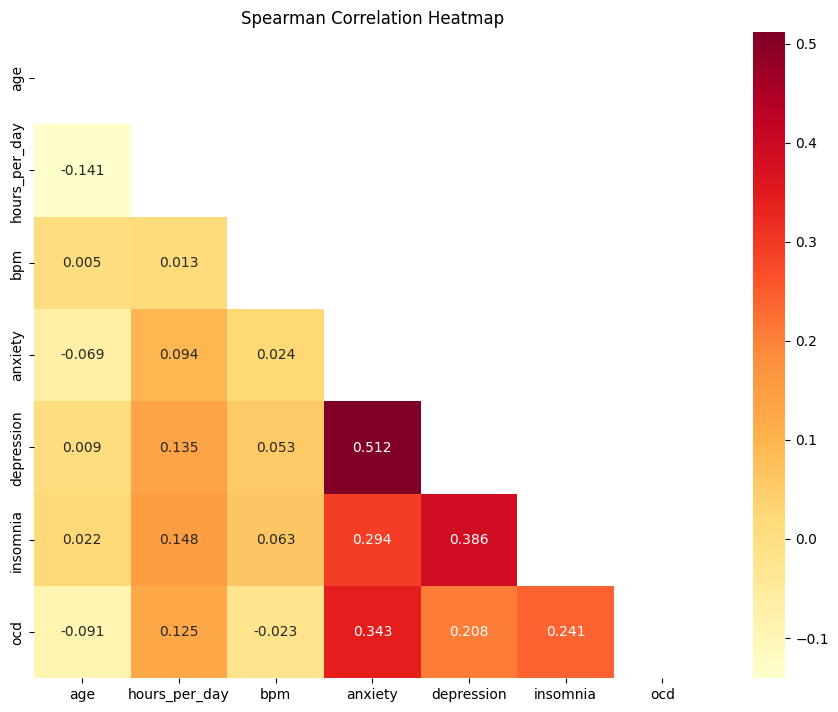

In [24]:
correlation_matrix=numericals.corr(method="spearman")
mask=np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(9, 7))
sns.heatmap(correlation_matrix, annot=True, cmap="YlOrRd", fmt=".3f", mask=mask)
plt.tight_layout() 
plt.title("Spearman Correlation Heatmap")
plt.savefig("Images/heatmap1.png", bbox_inches='tight') #El 'tight es para que no quede un espacio en blanco al costado, molestando en el README

plt.show()

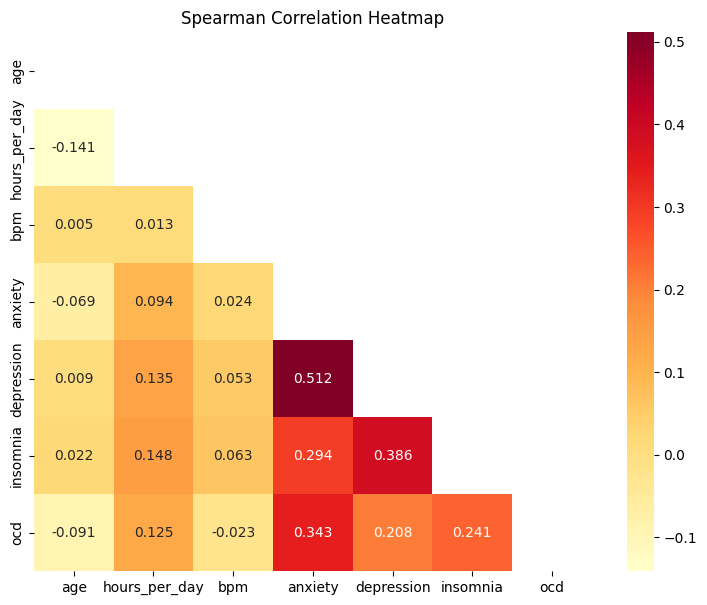

In [25]:
plt.figure(figsize=(9, 7))
sns.heatmap(correlation_matrix, annot=True, cmap="YlOrRd", fmt=".3f", mask=mask)


plt.title("Spearman Correlation Heatmap")
plt.savefig("Images/heatmap1.png", bbox_inches="tight")
plt.show()

In [26]:
correlation_matrix

,age,hours_per_day,bpm,anxiety,depression,insomnia,ocd
age,1.000000,-0.140862,0.005471,-0.069419,0.008929,0.021595,-0.091201
hours_per_day,-0.140862,1.000000,0.013089,0.094299,0.135172,0.148057,0.125355
bpm,0.005471,0.013089,1.000000,0.023565,0.053002,0.062908,-0.023054
anxiety,-0.069419,0.094299,0.023565,1.000000,0.511688,0.293763,0.342883
depression,0.008929,0.135172,0.053002,0.511688,1.000000,0.386264,0.208211
insomnia,0.021595,0.148057,0.062908,0.293763,0.386264,1.000000,0.240659
ocd,-0.091201,0.125355,-0.023054,0.342883,0.208211,0.240659,1.000000


El valor más alto de correlación es de 0.51 por lo que no hay correlaciones muy altas entre pares de variables. Después haremos un VIF
para estudiar la multicolinearidad.

Por las dudas vamos a calcular el máximo de la matriz de correlación para verificar que es 0.51. Para ello vamos a hacer una máscara
quitando los valores iguales a 1 ya que no interesan.

In [27]:
mask=(correlation_matrix <1)
masked_matrix=correlation_matrix.where(mask)

max_correlation = masked_matrix.max().max()
print(f'El valor más alto de correlación es {max_correlation:.2f}')

El valor más alto de correlación es 0.51


Veamos histogramas de las columnas numéricas (las categóricas por el momento no tienen numeros por lo que no se pueden graficar)

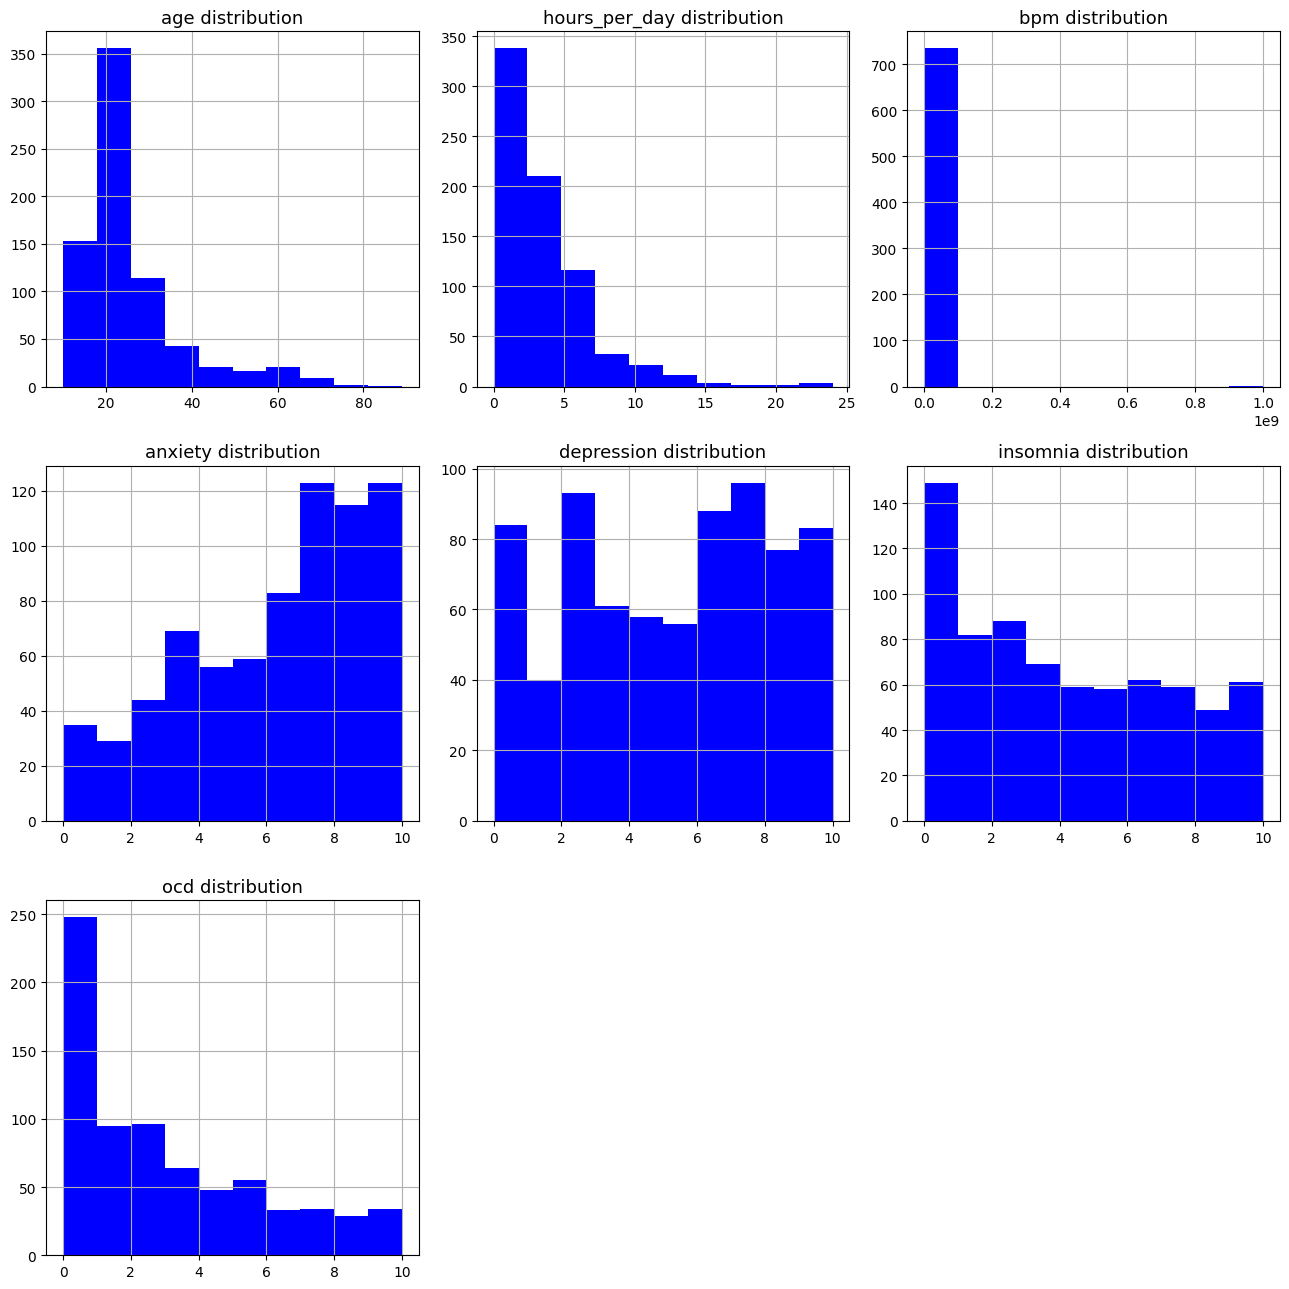

In [28]:
import matplotlib.pyplot as plt

def histograms_plot(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(13,13))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=10, ax=ax, facecolor='blue')
        ax.set_title(feature + " distribution", color='black', fontsize=13)  
    fig.tight_layout()  
    plt.show()

histograms_plot(numericals, numericals.columns, 3, 3)


In [29]:
def histograms_plot(dataframe, features, rows, cols, filename):
    fig = plt.figure(figsize=(13, 13))
    for i, feature in enumerate(features):
        ax = fig.add_subplot(rows, cols, i+1)
        dataframe[feature].hist(bins=10, ax=ax, facecolor='blue')
        ax.set_title(feature + " distribution", color='black', fontsize=13)
    fig.tight_layout()  
    fig.savefig(filename)  
    plt.close(fig)  

histograms_plot(numericals, numericals.columns, 3, 3, 'Images/histograms1.png')

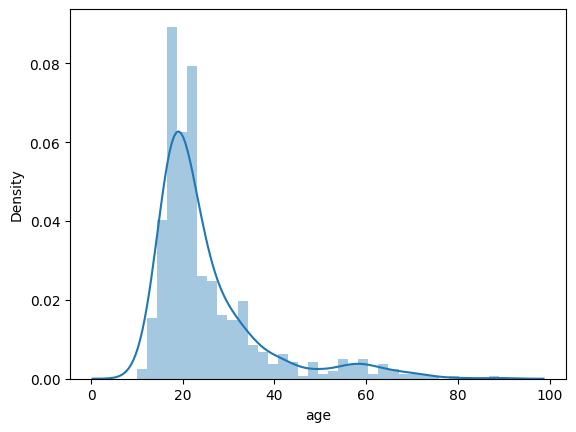

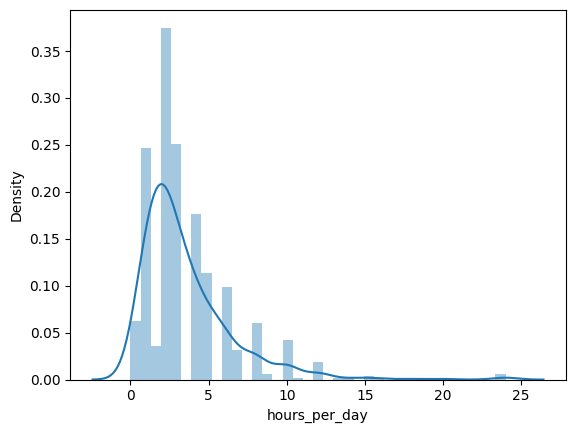

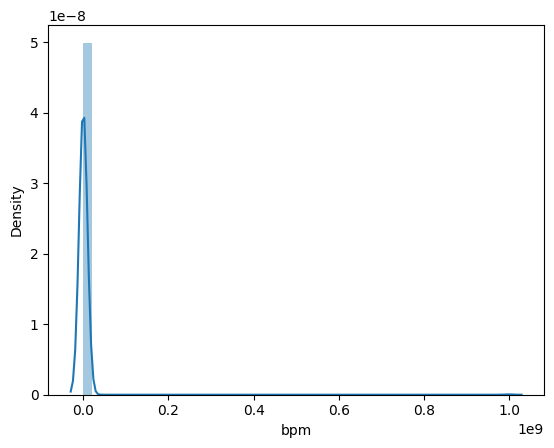

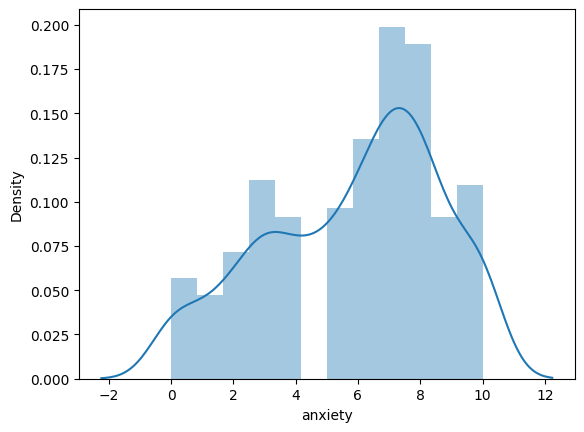

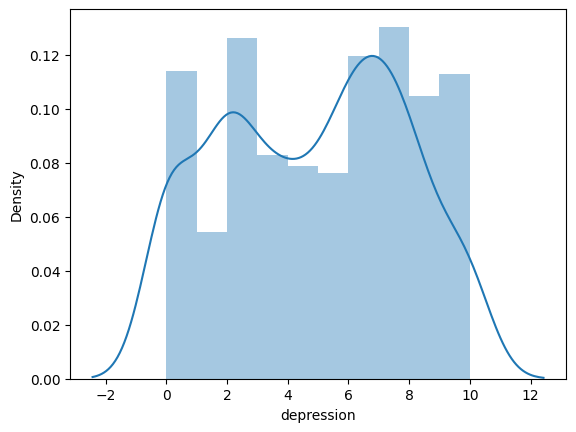

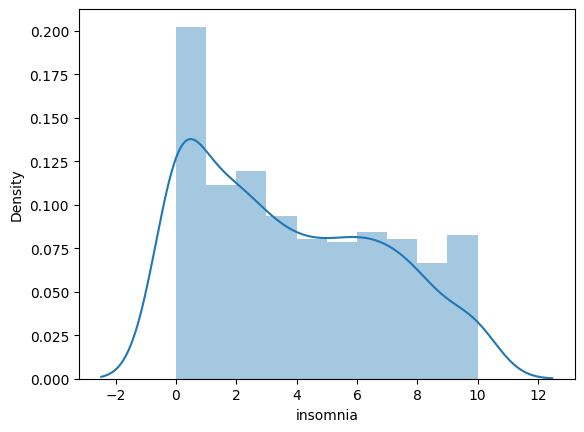

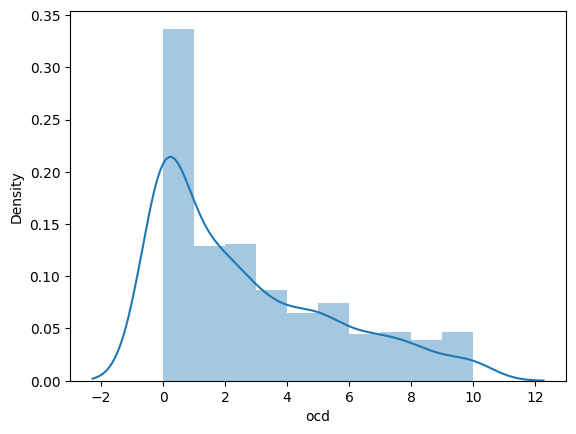

In [30]:
for i in numericals.columns.to_list():
    sns.distplot(numericals[i])
    plt.show()

### Boxplots

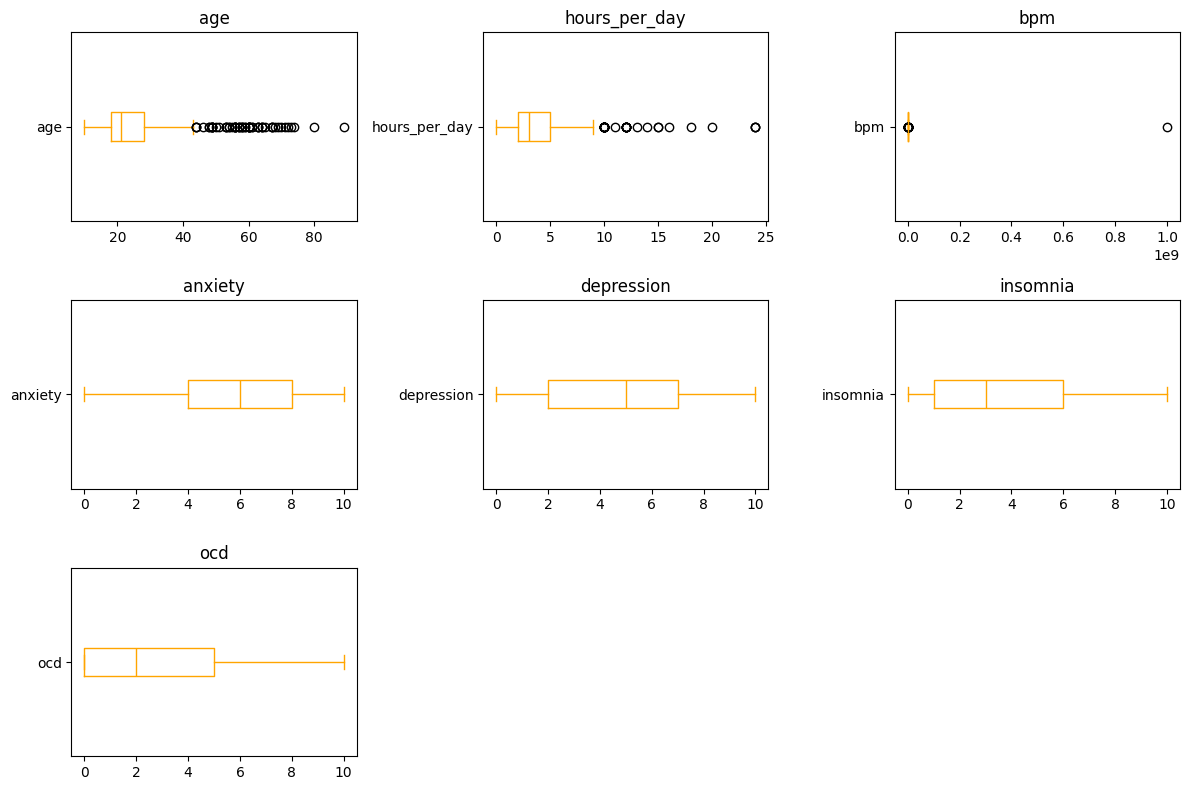

In [31]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(numericals, 1):
    plt.subplot(3, 3, i)
    data[col].plot(kind='box', vert=False, color='orange')
    plt.title(col)
plt.tight_layout()
plt.show()

Aquí se pueden ver los outliers con más claridad. Más adelante los eliminaremos. Sobre todo en 'age' y 'hours_per_day'. También alguno en 'bpm'

### Numerical Variables

Previo a hacer los tratamientos de las variables numéricas, se decide eliminar la columna 'bpm' (beats per minute) debido a las siguientes razones:

- En el heatmap se ve que tiene correlaciones muy bajas con respecto a las otras variables.
- Tiene mucha skewness positiva (viendo el histograma anterior de bpm).
- En el boxplot solo se ven outliers.
- Tiene alrededor de 14% de nulos, mientras que el resto de las variables ninguna supera el 1.1%.
- Por último, tampoco tiene mucha importancia a nivel conceptual para el análisis que se va a realizar. 

In [32]:
data.columns

Index(['timestamp', 'age', 'primary_streaming_service', 'hours_per_day',
       'while_working', 'instrumentalist', 'composer', 'fav_genre',
       'exploratory', 'foreign_languages', 'bpm', 'frequency_[classical]',
       'frequency_[country]', 'frequency_[edm]', 'frequency_[folk]',
       'frequency_[gospel]', 'frequency_[hip_hop]', 'frequency_[jazz]',
       'frequency_[k_pop]', 'frequency_[latin]', 'frequency_[lofi]',
       'frequency_[metal]', 'frequency_[pop]', 'frequency_[r&b]',
       'frequency_[rap]', 'frequency_[rock]', 'frequency_[video_game_music]',
       'anxiety', 'depression', 'insomnia', 'ocd', 'music_effects',
       'permissions'],
      dtype='object')

In [33]:
numericals.columns

Index(['age', 'hours_per_day', 'bpm', 'anxiety', 'depression', 'insomnia',
       'ocd'],
      dtype='object')

In [34]:
data.isna().sum()

timestamp                       0
age                             1
primary_streaming_service       1
hours_per_day                   0
while_working                   3
instrumentalist                 4
composer                        1
fav_genre                       0
exploratory                     0
foreign_languages               4
bpm                             0
frequency_[classical]           0
frequency_[country]             0
frequency_[edm]                 0
frequency_[folk]                0
frequency_[gospel]              0
frequency_[hip_hop]             0
frequency_[jazz]                0
frequency_[k_pop]               0
frequency_[latin]               0
frequency_[lofi]                0
frequency_[metal]               0
frequency_[pop]                 0
frequency_[r&b]                 0
frequency_[rap]                 0
frequency_[rock]                0
frequency_[video_game_music]    0
anxiety                         0
depression                      0
insomnia      

In [35]:
data.isna().sum().value_counts()

0    26
1     3
4     2
3     1
8     1
Name: count, dtype: int64

In [36]:
sum(data.isna().sum())

22

In [37]:
data.shape

(736, 33)

Luego de haber immputado los nulos en 'bpm' quedaron 22 en total. Viendo el .value_counts() se puede observar que solo hay una columna con 8
nulos y el resto tienen 3 o menos. Dado que hay 736 filas en el dataframe, entiendo que es correcto eliminarlos (hice un .value_counts() porque en el data.isna().sum() no se veían todos)

In [38]:
data.dropna(inplace=True)

In [39]:
sum(data.isna().sum())

0

In [40]:
numericals

,age,hours_per_day,bpm,anxiety,depression,insomnia,ocd
0,18.0,3.0,156.0,3.0,0.0,1.0,0.0
1,63.0,1.5,119.0,7.0,2.0,2.0,1.0
2,18.0,4.0,132.0,7.0,7.0,10.0,2.0
3,61.0,2.5,84.0,9.0,7.0,3.0,3.0
4,18.0,4.0,107.0,7.0,2.0,5.0,9.0
...,...,...,...,...,...,...,...
731,17.0,2.0,120.0,7.0,6.0,0.0,9.0
732,18.0,1.0,160.0,3.0,2.0,2.0,5.0
733,19.0,6.0,120.0,2.0,2.0,2.0,2.0
734,19.0,5.0,170.0,2.0,3.0,2.0,1.0


In [41]:
numericals=data.select_dtypes(include=np.number)

In [42]:
numericals.columns

Index(['age', 'hours_per_day', 'bpm', 'anxiety', 'depression', 'insomnia',
       'ocd'],
      dtype='object')

In [43]:
numericals.isna().sum()

age              0
hours_per_day    0
bpm              0
anxiety          0
depression       0
insomnia         0
ocd              0
dtype: int64

In [44]:
data['age']=data['age'].fillna(data['age'].mean())


#### Transformations using logarithms and square roots

Presento a continuación las 2 funciones que se van a utilizar para las transformaciones:

In [45]:
#Logaritmo
def log_transfom_clean_(x):   
    if np.isfinite(x) and x!=0:
        return np.log(x)
    else:
        return np.NAN 

In [46]:
#Raiz Cuadrada
def sqrt_transfom_clean_(x): 
    if np.isfinite(x) and x>=0:
        return np.sqrt(x)
    else:
        return np.NAN

### age

In [47]:
data.age.value_counts()

age
18.0    81
19.0    60
17.0    59
21.0    48
16.0    44
        ..
73.0     1
72.0     1
69.0     1
10.0     1
89.0     1
Name: count, Length: 61, dtype: int64

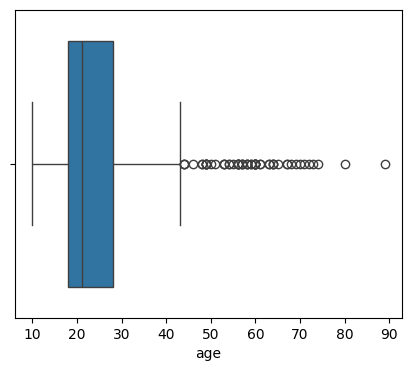

In [48]:
plt.figure(figsize=(5, 4))
sns.boxplot(x=data['age'])
plt.show()

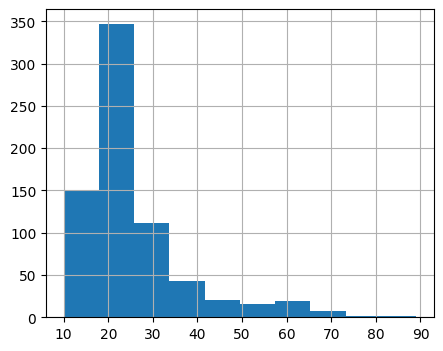

In [49]:
data.age.hist(figsize=(5,4))
plt.show()

<Axes: xlabel='age', ylabel='Density'>

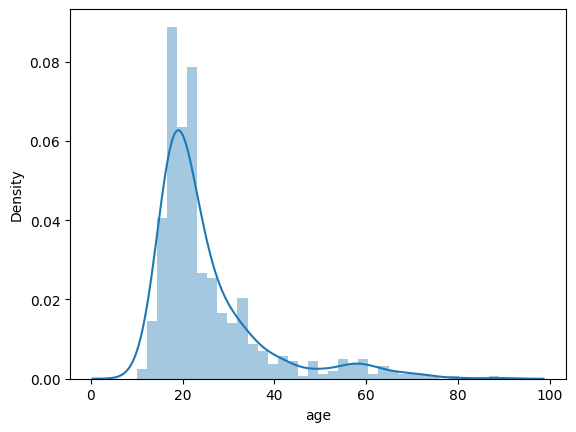

In [50]:
sns.distplot(data.age)

Se procede a utilizar las funciones para ver cual es más apropiada (lo mismo se hará con el resto de las variables numéricas). Utilizaremos la que deje una gráfica que se asemeje más a una distribución normal

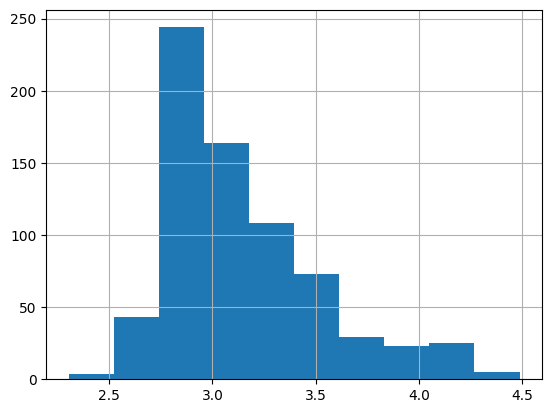

In [51]:
# Using the functions to check the distribution of transformed data
pd.Series(map(log_transfom_clean_, data['age'])).hist()
plt.show() 

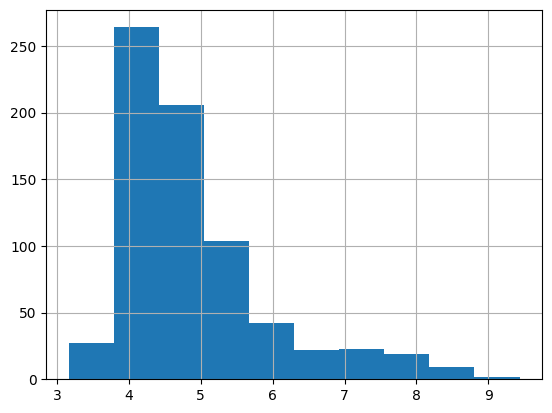

In [52]:
pd.Series(map(sqrt_transfom_clean_, data['age'])).hist()
plt.show()

In [53]:
#La gráfica del logaritmo se aproxima más a una distribución normal --> dejo la del logaritmo.
data['age']=list(map(log_transfom_clean_, data['age']))

<Axes: >

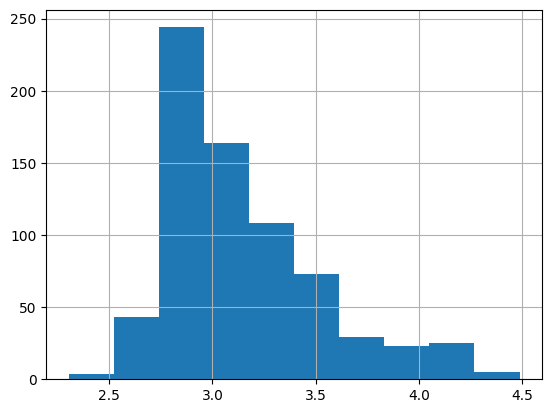

In [54]:
data['age'].hist()

In [55]:
# Checking how many values will be removed if the outliers are removed
iqr = np.percentile(data['age'],75) - np.percentile(data['age'],25)
upper_limit = np.percentile(data['age'],75) +1.5*iqr
print(upper_limit)

3.9949536385937625


In [56]:
new_df = data[data['age'] > upper_limit]
len(new_df)  # This checks the number of points that will be removed

39

In [57]:
points = list(filter(lambda x: x < upper_limit, data['age']))
len(points)

679

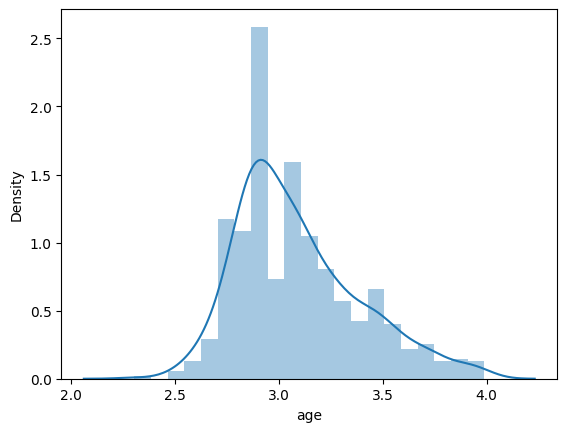

In [58]:
# Removing outliers
data = data[data['age'] < upper_limit]
sns.distplot(data['age'])
plt.show()  #Va quedando mejor. si fuera income estaria rara. pero dado que es timelag esta ok

### hours_per_day

In [59]:
data.hours_per_day.value_counts()

hours_per_day
2.00     155
3.00     111
1.00     107
4.00      80
5.00      52
6.00      44
8.00      27
0.50      20
10.00     20
7.00      15
1.50      14
12.00      8
0.00       5
2.50       5
9.00       3
0.25       2
24.00      2
0.70       1
4.50       1
20.00      1
16.00      1
15.00      1
14.00      1
0.10       1
11.00      1
18.00      1
Name: count, dtype: int64

<Axes: >

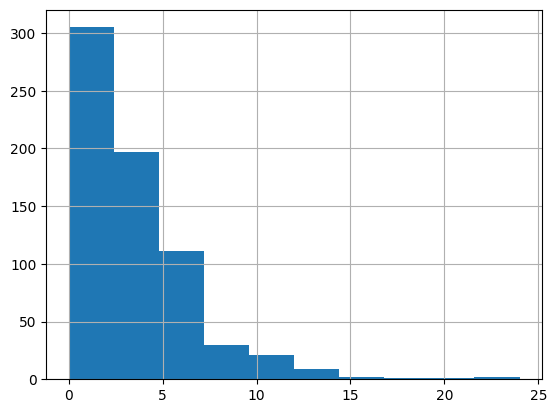

In [60]:
data['hours_per_day'].hist()

<Axes: xlabel='hours_per_day', ylabel='Density'>

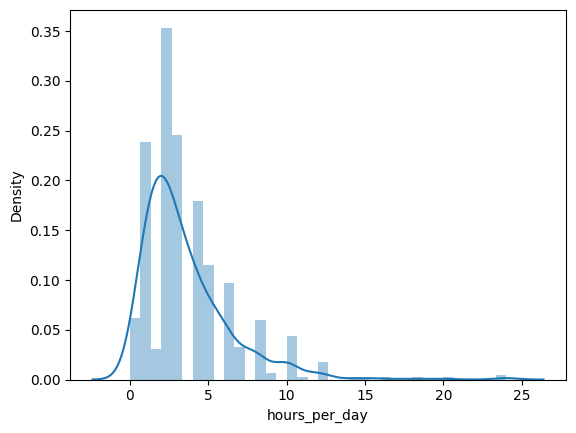

In [61]:
sns.distplot(data['hours_per_day'])

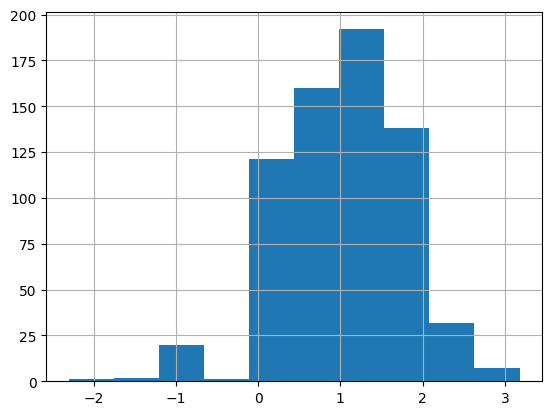

In [62]:
hours_per_day_log=pd.Series(map(log_transfom_clean_, data['hours_per_day'])).hist()
plt.show() 

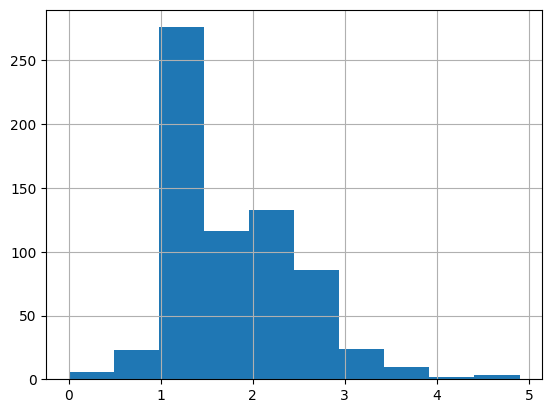

In [63]:
#Raiz
hours_per_day_sqrt=pd.Series(map(sqrt_transfom_clean_, data['hours_per_day'])).hist()
plt.show()  

In [64]:
#Me quedo con el diagrama de la raiz porque el del logaritmo devuelve valores negativos.
data['hours_per_day']=list(map(sqrt_transfom_clean_, data['hours_per_day']))

In [65]:
iqr = np.percentile(data['hours_per_day'],75) - np.percentile(data['hours_per_day'],25)
upper_limit = np.percentile(data['hours_per_day'],75) +1.5*iqr
print(upper_limit)

3.4688496001898317


In [66]:
len(data[data['hours_per_day'] > upper_limit])

7

In [67]:
points = list(filter(lambda x: x < upper_limit, data['hours_per_day']))
len(points)

672

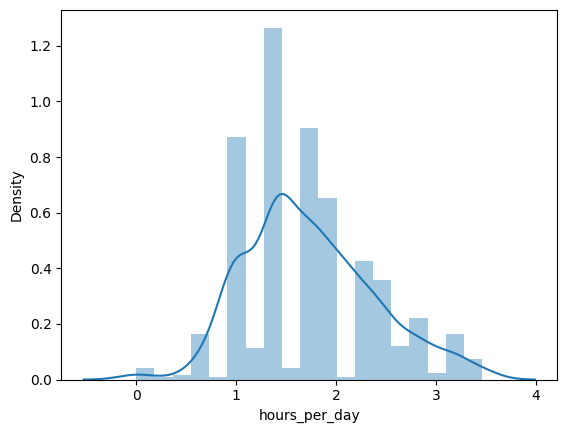

In [68]:
# Removing outliers
data = data[data['hours_per_day'] < upper_limit]
sns.distplot(data['hours_per_day'])
plt.show()

## Anxiety

In [69]:
data.anxiety.value_counts()

anxiety
7.0     114
8.0     109
6.0      79
10.0     64
3.0      60
5.0      53
9.0      51
4.0      50
2.0      38
0.0      29
1.0      24
7.5       1
Name: count, dtype: int64

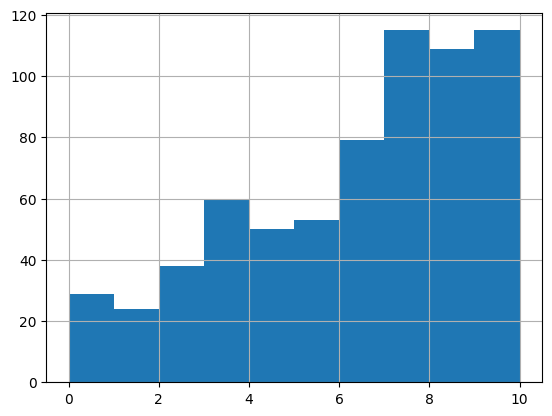

In [70]:
data.anxiety.hist()
plt.show()

<Axes: xlabel='anxiety', ylabel='Density'>

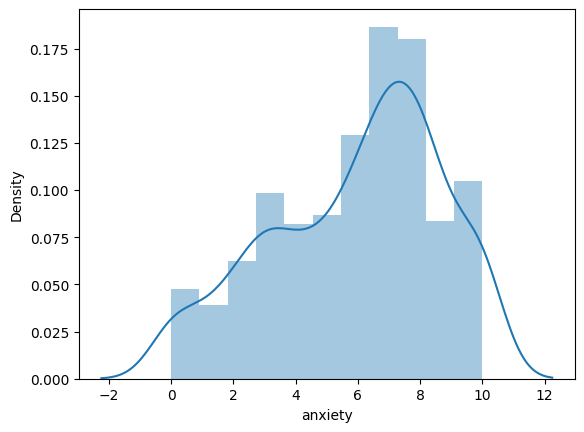

In [71]:
sns.distplot(data['anxiety'])

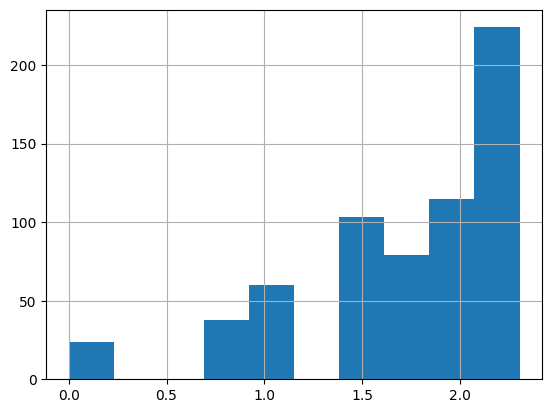

In [72]:
pd.Series(map(log_transfom_clean_, data['anxiety'])).hist()
plt.show()

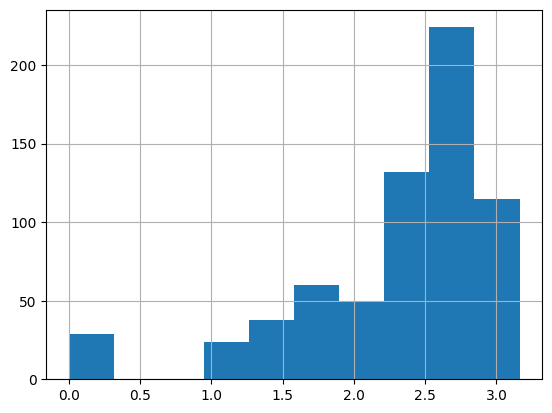

In [73]:
pd.Series(map(sqrt_transfom_clean_, data['anxiety'])).hist()
plt.show() 

A anxiety no le aplico transformación

In [74]:
iqr = np.percentile(data['anxiety'],75) - np.percentile(data['anxiety'],25)
upper_limit = np.percentile(data['anxiety'],75) +1.5*iqr
print(upper_limit)

14.0


In [75]:
len(data[data['anxiety'] > upper_limit])

0

In [76]:
numericals.columns

Index(['age', 'hours_per_day', 'bpm', 'anxiety', 'depression', 'insomnia',
       'ocd'],
      dtype='object')

## Depression

In [77]:
data.depression.value_counts()

depression
7.0     92
6.0     83
2.0     81
8.0     75
0.0     71
3.0     54
4.0     52
5.0     51
10.0    39
9.0     37
1.0     35
3.5      2
Name: count, dtype: int64

<Axes: >

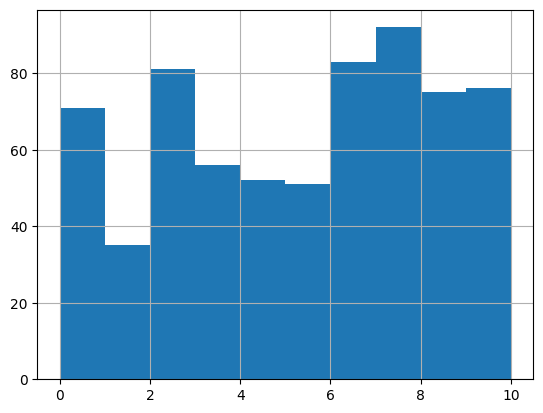

In [78]:
data.depression.hist()

<Axes: xlabel='depression', ylabel='Density'>

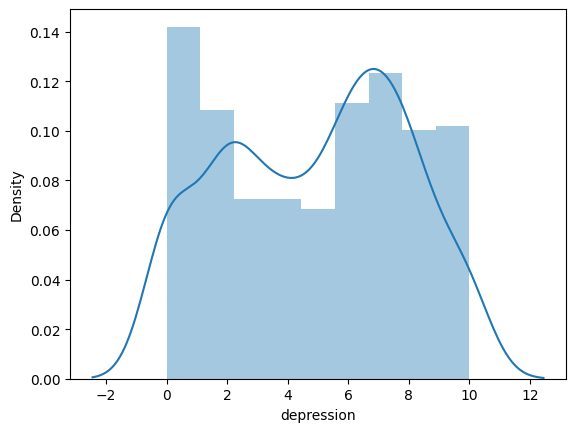

In [79]:
sns.distplot(data['depression'])

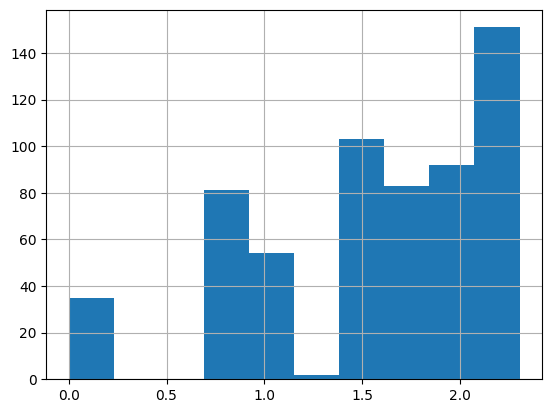

In [80]:
pd.Series(map(log_transfom_clean_, data['depression'])).hist()
plt.show()

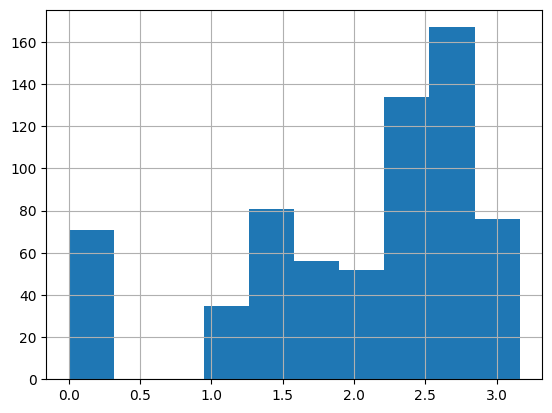

In [81]:
pd.Series(map(sqrt_transfom_clean_, data['depression'])).hist()
plt.show() 

Queda mejor sin transformación.

In [82]:
iqr = np.percentile(data['depression'],75) - np.percentile(data['depression'],25)
upper_limit = np.percentile(data['depression'],75) +1.5*iqr
print(upper_limit)

14.5


In [83]:
numericals.columns

Index(['age', 'hours_per_day', 'bpm', 'anxiety', 'depression', 'insomnia',
       'ocd'],
      dtype='object')

## Insomia 

In [84]:
data.insomnia.value_counts()

insomnia
0.0     137
1.0      77
2.0      76
3.0      63
6.0      58
7.0      57
4.0      57
5.0      52
8.0      46
10.0     27
9.0      21
3.5       1
Name: count, dtype: int64

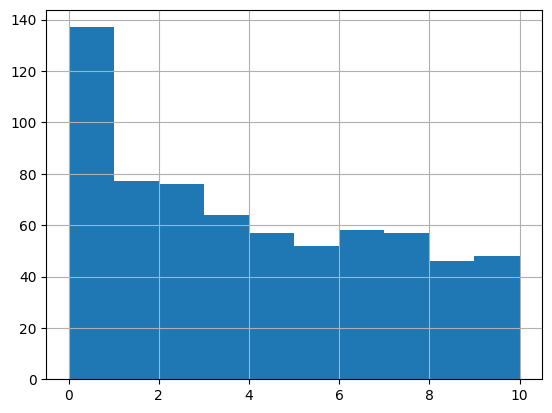

In [85]:
data.insomnia.hist()
plt.show()

<Axes: xlabel='insomnia', ylabel='Density'>

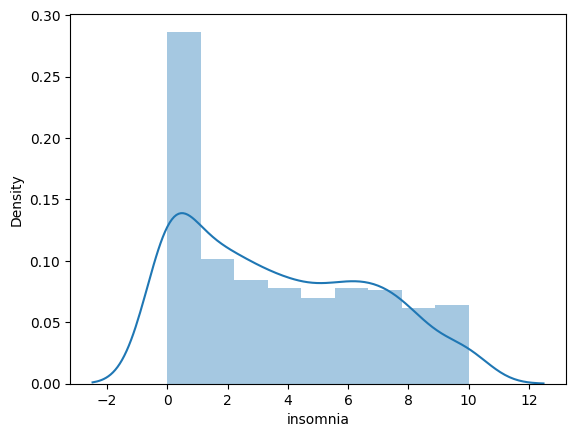

In [86]:
sns.distplot(data['insomnia'])

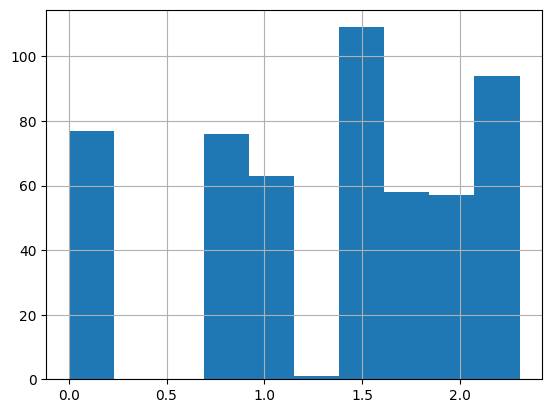

In [87]:
pd.Series(map(log_transfom_clean_, data['insomnia'])).hist()
plt.show()  

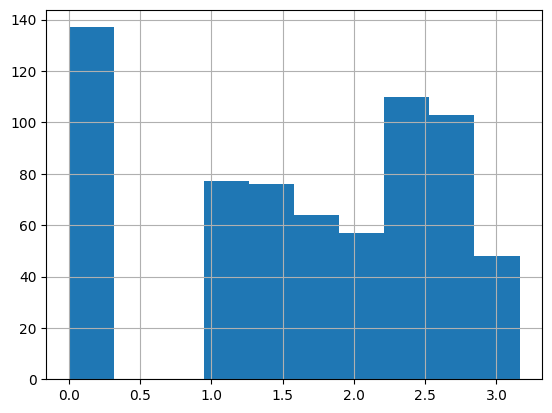

In [88]:
pd.Series(map(sqrt_transfom_clean_, data['insomnia'])).hist()
plt.show() 

In [89]:
#Queda mejor con el logaritmo
#data.insomnia=pd.Series(map(log_transfom_clean_, data['insomnia']))

In [90]:
iqr_insomnia = np.percentile(data['insomnia'], 75) - np.percentile(data['insomnia'], 25)
upper_limit_insomnia = np.percentile(data['insomnia'], 75) + 1.5 * iqr_insomnia

print("Upper limit for insomnia:", upper_limit_insomnia)

Upper limit for insomnia: 13.5


In [91]:
outliers_insomnia = data[data['insomnia'] > upper_limit_insomnia]
print("Number of outliers in insomnia:", len(outliers_insomnia))

Number of outliers in insomnia: 0


Lower limit for insomnia: -6.5
Number of outliers below lower limit in insomnia: 0


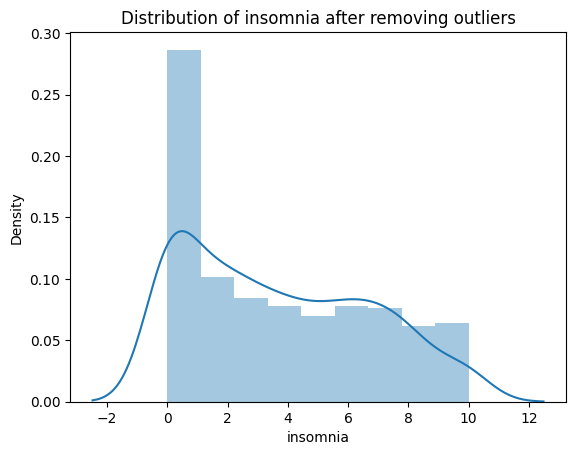

In [92]:
Q1 = np.percentile(data['insomnia'], 25)
Q3 = np.percentile(data['insomnia'], 75)
IQR = Q3 - Q1
lower_limit_insomnia = Q1 - 1.5 * IQR

print("Lower limit for insomnia:", lower_limit_insomnia)

outliers_below = data[data['insomnia'] < lower_limit_insomnia]
print("Number of outliers below lower limit in insomnia:", len(outliers_below))

data = data[data['insomnia'] >= lower_limit_insomnia]

sns.distplot(data['insomnia'])
plt.title('Distribution of insomnia after removing outliers')
plt.show()

Al parecer no es necesario eliminar outliers de insomnia (tanto de upper limit como de lower)

### OCD

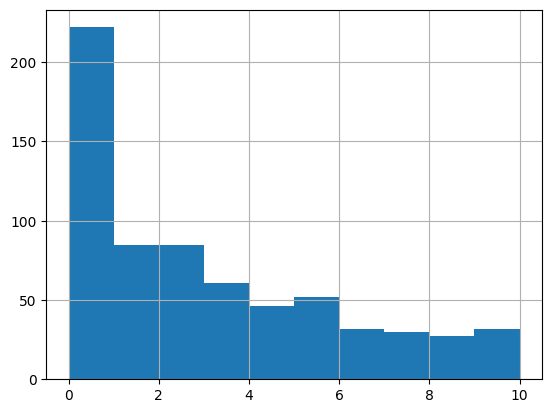

In [93]:
data.ocd.hist()
plt.show()

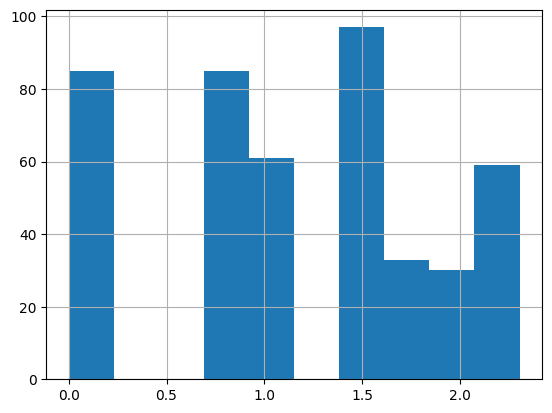

In [94]:
pd.Series(map(log_transfom_clean_, data['ocd'])).hist()
plt.show() 

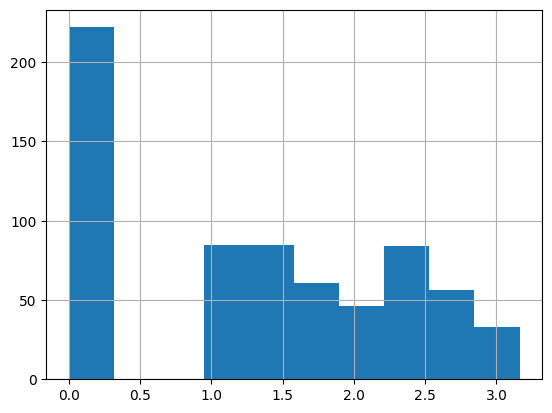

In [95]:
ocd_sqrt=pd.Series(map(sqrt_transfom_clean_, data['ocd'])).hist()
plt.show() 

In [96]:
iqr = np.percentile(data['ocd'],75) - np.percentile(data['ocd'],25)
upper_limit = np.percentile(data['ocd'],75) +1.5*iqr
print(upper_limit)

12.5


In [97]:
new_df = data[data['ocd'] > upper_limit]
len(new_df) 

0

In [98]:
lower_limit = np.percentile(data['ocd'],75) -1.5*iqr
print(lower_limit)

-2.5


In [99]:
new_df = data[data['ocd'] < lower_limit]
len(new_df)
#Tiene sentido porque 'ocd' tenía que ser positivo por como fue definido en la encuesta

0

En base a lo anterior, no hay que quitarle outliers a 'ocd'

Actualizamos 'numericals' luego de las transformaciones

In [100]:
numericals=data.select_dtypes(include=np.number)

In [101]:
numericals.columns

Index(['age', 'hours_per_day', 'bpm', 'anxiety', 'depression', 'insomnia',
       'ocd'],
      dtype='object')

In [102]:
#count=np.isinf(X).values.sum() 
#print("It contains " + str(count) + " infinite values")

Heatmap luego de las transformaciones:

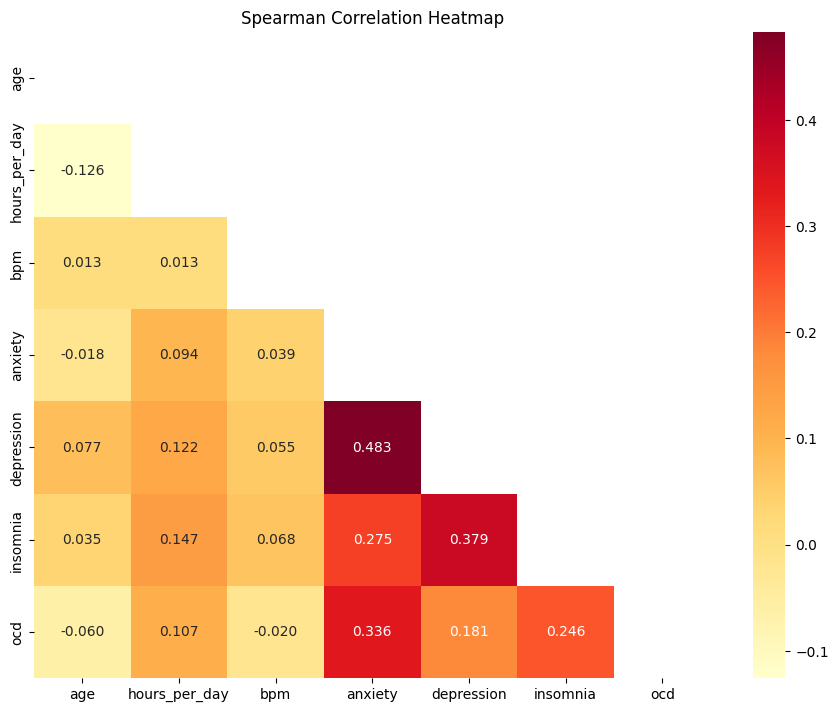

In [103]:
correlation_matrix=numericals.corr(method="spearman")
mask=np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(9, 7))
sns.heatmap(correlation_matrix, annot=True, cmap="YlOrRd", fmt=".3f", mask=mask)
plt.tight_layout() 
plt.title("Spearman Correlation Heatmap")
plt.savefig("Images/heatmap2.png", bbox_inches='tight') #El 'tight es para que no quede un espacio en blanco al costado, molestando en el README

plt.show()

Cambió muy poco respecto del anterior. Los valores cambiaron en general, menos de un 5%

In [104]:
mask=(correlation_matrix <1)
masked_matrix=correlation_matrix.where(mask)

max_correlation=masked_matrix.max().max()
print(f'El valor más alto de correlación es {max_correlation:.2f}')

El valor más alto de correlación es 0.48


Dado que las correlaciones siguen siendo bajas, no tenemos que cargarnos variables

Volvemos a llamar a la función de los Histogramas para ver como quedaron luego de las transformaciones

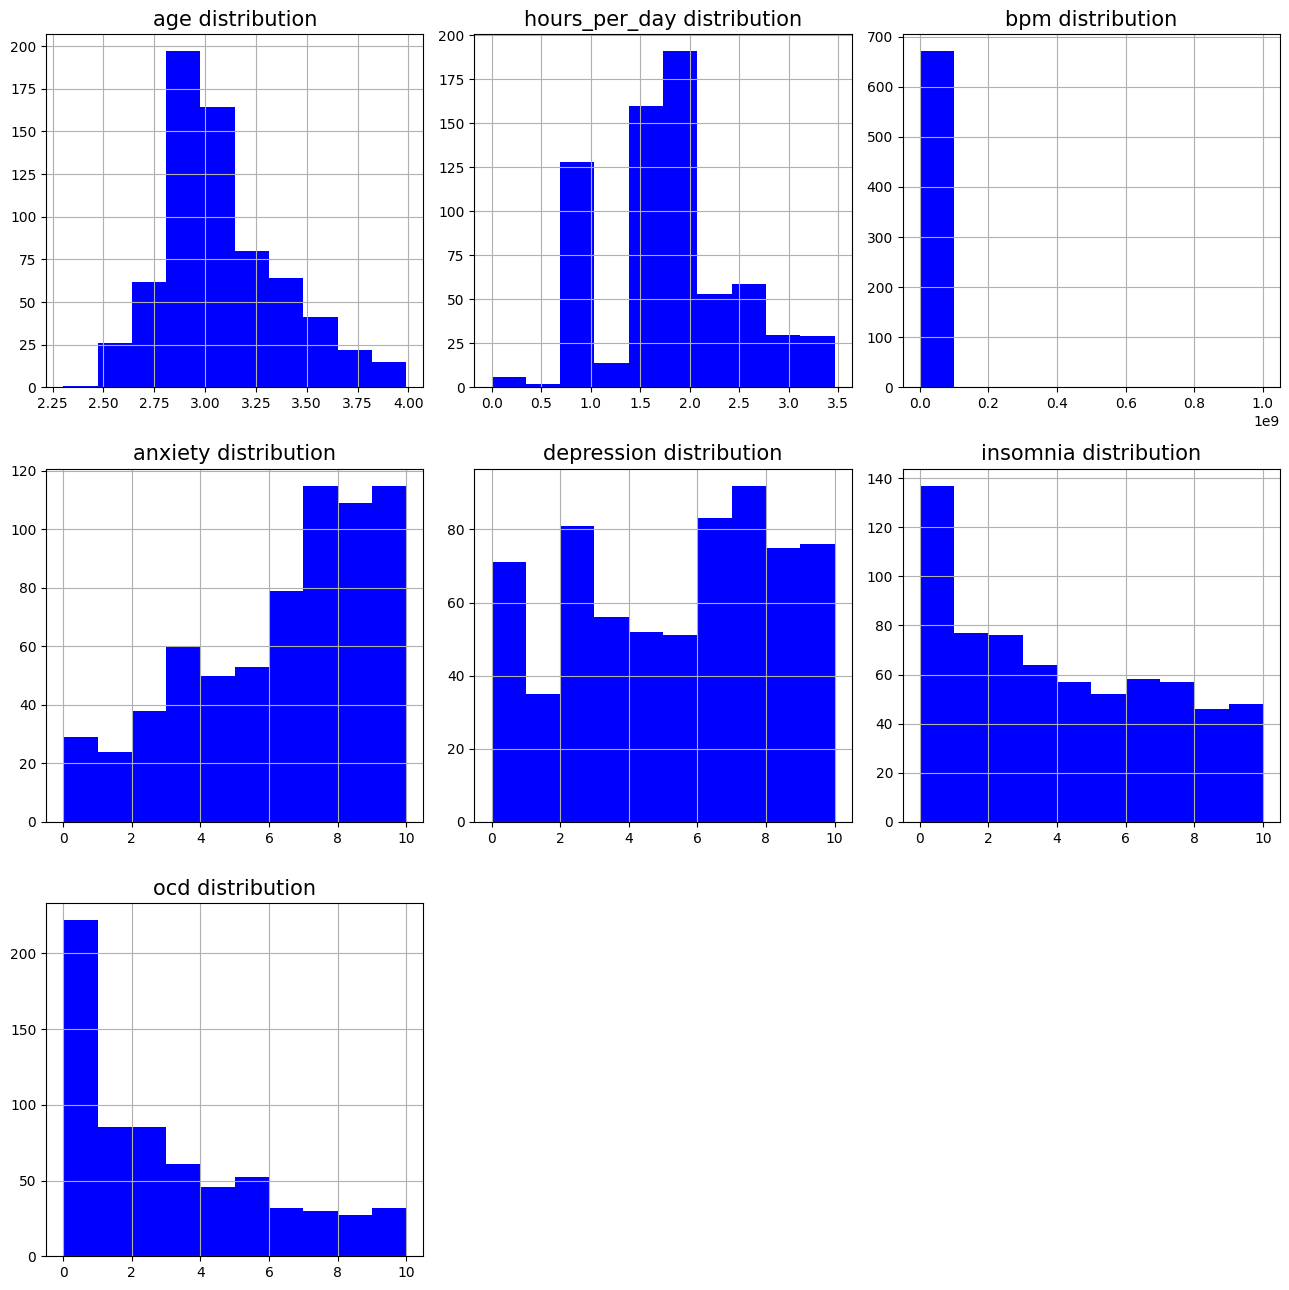

In [105]:
import matplotlib.pyplot as plt

def histograms_plot(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(13,13))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=10, ax=ax, facecolor='blue')
        ax.set_title(feature + " distribution", color='black', fontsize=15)  
    fig.tight_layout()  
    plt.show()

histograms_plot(numericals, numericals.columns, 3, 3)

In [106]:
def histograms_plot(dataframe, features, rows, cols, filename):
    fig = plt.figure(figsize=(13, 13))
    for i, feature in enumerate(features):
        ax = fig.add_subplot(rows, cols, i+1)
        dataframe[feature].hist(bins=10, ax=ax, facecolor='blue')
        ax.set_title(feature + " distribution", color='black', fontsize=13)
    fig.tight_layout()  
    fig.savefig(filename)  
    plt.close(fig)  

histograms_plot(numericals, numericals.columns, 3, 3, 'Images/histograms2.png')

Veamos un VIF para ver si podemos cargarnos alguna variable numérica

In [107]:
X_num=data.select_dtypes(include=np.number)
vif_data = pd.DataFrame()
vif_data["Variable"] = X_num.columns
vif_data["VIF"] = [variance_inflation_factor(X_num.values, i) for i in range(X_num.shape[1])]
vif_data
#No hay valores superiores a 10 --> No eliminamos variables

,Variable,VIF
0,age,10.477949
1,hours_per_day,7.788290
2,bpm,1.011716
3,anxiety,8.019626
4,depression,5.357156
5,insomnia,3.020471
6,ocd,2.220390


### Variables categóricas

In [108]:
X_cat=data.select_dtypes(include=object)
X_cat.sample()

,timestamp,primary_streaming_service,while_working,instrumentalist,composer,fav_genre,exploratory,foreign_languages,frequency_[classical],frequency_[country],...,frequency_[latin],frequency_[lofi],frequency_[metal],frequency_[pop],frequency_[r&b],frequency_[rap],frequency_[rock],frequency_[video_game_music],music_effects,permissions
203,8/28/2022 21:11,Other streaming service,Yes,No,No,Folk,Yes,Yes,Rarely,Rarely,...,Rarely,Sometimes,Never,Rarely,Sometimes,Sometimes,Rarely,Sometimes,Improve,I understand.


In [109]:
X_cat.columns

Index(['timestamp', 'primary_streaming_service', 'while_working',
       'instrumentalist', 'composer', 'fav_genre', 'exploratory',
       'foreign_languages', 'frequency_[classical]', 'frequency_[country]',
       'frequency_[edm]', 'frequency_[folk]', 'frequency_[gospel]',
       'frequency_[hip_hop]', 'frequency_[jazz]', 'frequency_[k_pop]',
       'frequency_[latin]', 'frequency_[lofi]', 'frequency_[metal]',
       'frequency_[pop]', 'frequency_[r&b]', 'frequency_[rap]',
       'frequency_[rock]', 'frequency_[video_game_music]', 'music_effects',
       'permissions'],
      dtype='object')

**Eliminación de variables:**

Voy a eliminar las que comiencen con 'frequency' para no agregar tantas variables al modelo de regresión. De todas formas, al 
mantener la de 'fav_genre', las estoy contemplando en cierta medida.

También elimino 'timestamp' porque no tiene ninguna utilidad interesante. Tampoco es relevante para un análisis de Series de Tiempo.
Asímismo voy a cargarme 'Permissions' ya que tiene un único valor ('I understand') y sería ruido para el modelo

In [110]:
from functions import remove_the_frequency_columns
data=remove_the_frequency_columns(data, 'frequency')
data.columns

Index(['timestamp', 'age', 'primary_streaming_service', 'hours_per_day',
       'while_working', 'instrumentalist', 'composer', 'fav_genre',
       'exploratory', 'foreign_languages', 'bpm', 'anxiety', 'depression',
       'insomnia', 'ocd', 'music_effects', 'permissions'],
      dtype='object')

In [111]:
data.drop(columns=['timestamp','permissions'], inplace=True)

In [112]:
X_cat=data.select_dtypes(include=object)
X_cat.columns

Index(['primary_streaming_service', 'while_working', 'instrumentalist',
       'composer', 'fav_genre', 'exploratory', 'foreign_languages',
       'music_effects'],
      dtype='object')

## Testeos Chi2

Se quiere estudiar si las variables categóricas 'primary_streaming_service' y 'fav_genre' están relacionadas mediante un test de Chi2

In [113]:
data['primary_streaming_service'].unique()

array(['Spotify', 'YouTube Music', 'I do not use a streaming service.',
       'Apple Music', 'Other streaming service', 'Pandora'], dtype=object)

In [114]:
data['fav_genre'].unique()

array(['Video game music', 'R&B', 'Jazz', 'K pop', 'Rock', 'Country',
       'EDM', 'Pop', 'Hip hop', 'Rap', 'Classical', 'Metal', 'Folk',
       'Lofi', 'Gospel', 'Latin'], dtype=object)

In [115]:
data_crosstab = pd.crosstab(data['primary_streaming_service'], data['fav_genre'], margins=False)
data_crosstab

fav_genre,Classical,Country,EDM,Folk,Gospel,Hip hop,Jazz,K pop,Latin,Lofi,Metal,Pop,R&B,Rap,Rock,Video game music
primary_streaming_service,,,,,,,,,,,,,,,,
Apple Music,3,3,3,0,0,2,0,1,1,1,5,10,3,4,9,1
I do not use a streaming service.,9,0,1,1,0,0,0,0,0,0,8,9,2,0,19,13
Other streaming service,3,3,5,2,0,0,2,0,0,1,3,5,1,4,8,4
Pandora,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0
Spotify,25,15,20,20,1,26,14,19,1,8,60,68,23,10,111,17
YouTube Music,6,2,5,6,0,3,1,1,0,0,11,17,1,2,17,8


In [116]:
chi2, p, dof, expected = chi2_contingency(data_crosstab, correction=False)

print(f"\nChi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)


Chi-square statistic: 110.53450364110998
P-value: 0.004776708442234689
Degrees of freedom: 75
Expected frequencies:
[[3.21726190e+00 1.57440476e+00 2.32738095e+00 1.98511905e+00
  6.84523810e-02 2.19047619e+00 1.16369048e+00 1.43750000e+00
  1.36904762e-01 6.84523810e-01 5.95535714e+00 7.52976190e+00
  2.12202381e+00 1.36904762e+00 1.12946429e+01 2.94345238e+00]
 [4.33630952e+00 2.12202381e+00 3.13690476e+00 2.67559524e+00
  9.22619048e-02 2.95238095e+00 1.56845238e+00 1.93750000e+00
  1.84523810e-01 9.22619048e-01 8.02678571e+00 1.01488095e+01
  2.86011905e+00 1.84523810e+00 1.52232143e+01 3.96726190e+00]
 [2.86755952e+00 1.40327381e+00 2.07440476e+00 1.76934524e+00
  6.10119048e-02 1.95238095e+00 1.03720238e+00 1.28125000e+00
  1.22023810e-01 6.10119048e-01 5.30803571e+00 6.71130952e+00
  1.89136905e+00 1.22023810e+00 1.00669643e+01 2.62351190e+00]
 [3.49702381e-01 1.71130952e-01 2.52976190e-01 2.15773810e-01
  7.44047619e-03 2.38095238e-01 1.26488095e-01 1.56250000e-01
  1.48809524

In [117]:
alpha = 0.05 
if p < alpha:
    print("\nSe rechaza Hipótesis nula")
else:
    print("\nNo se rechaza hipótesis nula")


Se rechaza Hipótesis nula


En este caso, p-value<0.05, lo que indica una asociación significativa entre 'primary_streaming_service' y 'fav_genre'. Rechazamos la hipótesis nula, que asume que no hay relación entre las dos variables categóricas. Por lo tanto, vamos a droppear una de las variables. 

Se decide droppear primary_streaming_service ya que al haber droppeado las de frequency de cada género, conviene mantener la de género fvaorito para
conservar información de las variables de frequency (como se explicó anteriormente)

In [118]:
data.drop(columns=['primary_streaming_service'], inplace=True)
data.columns

Index(['age', 'hours_per_day', 'while_working', 'instrumentalist', 'composer',
       'fav_genre', 'exploratory', 'foreign_languages', 'bpm', 'anxiety',
       'depression', 'insomnia', 'ocd', 'music_effects'],
      dtype='object')

## Linear Regression Model

Elegimos la variable 'hours_per_day' como nuestra variable target porque resulta interesante estudiar esta en particular. Al ser numérica, la quitaremos dentro del vector de variables numéricas.
Luego transformaremos las categóricas para que queden como numéricas y así poder realizar el modelo de Regresión Lineal

In [119]:
X_num = data.select_dtypes(include=np.number).drop(columns=['hours_per_day'])
X_cat = data.select_dtypes(include=object)
Y = data['hours_per_day']

#### Normalización de Datos Numéricos

In [120]:
transformer = Normalizer().fit(X_num)
x_normalized = transformer.transform(X_num)

#### Estandarización de Datos Numéricos

In [121]:
scaler = StandardScaler().fit(X_num)
x_standardized = scaler.transform(X_num)

#### Encoding the model

Para convertir las variables categóricas a numéricas vamos usar un Label Encoder en las nominales (sería únicamente 'fav_genre' pues la otra la eliminamos con el Chi2) y un OneHotEncoder para el resto. Luego vamos a concatenarlas con las numéricas. Primero lo haremos con x_normalized

In [122]:
label_encoder = LabelEncoder()
#X_cat['primary_streaming_service'] = label_encoder.fit_transform(X_cat['primary_streaming_service'])
X_cat['fav_genre'] = label_encoder.fit_transform(X_cat['fav_genre'])

encoder = OneHotEncoder(drop='first').fit(X_cat)
encoded = encoder.transform(X_cat).toarray()
encoded_columns = encoder.get_feature_names_out(X_cat.columns)

x_encoded = pd.DataFrame(encoded, columns=encoded_columns)

if isinstance(x_normalized, np.ndarray):
    x_normalized = pd.DataFrame(x_normalized, columns=[f"feature_{i}" for i in range(x_normalized.shape[1])])

X = pd.concat([x_normalized, x_encoded], axis=1)

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Es necesario resetear los índices para que funcione el modelo

In [124]:
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

#### Primer Modelo de LR

In [125]:
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

model = sm.OLS(y_train, X_train).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          hours_per_day   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.183
Method:                 Least Squares   F-statistic:                     5.299
Date:                Mon, 17 Jun 2024   Prob (F-statistic):           1.10e-15
Time:                        13:20:11   Log-Likelihood:                -471.29
No. Observations:                 537   AIC:                             1001.
Df Residuals:                     508   BIC:                             1125.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [126]:
lm = linear_model.LinearRegression()

lm.fit(X_train, y_train)

print("R-squared value on training set:", round(lm.score(X_train, y_train), 2))

predictions = lm.predict(X_test)

print("R-squared value on test set:", round(r2_score(y_test, predictions), 2))
print("Intercept of the model:", lm.intercept_)
print("MSE:", mean_squared_error(y_test, predictions))

R-squared value on training set: 0.23
R-squared value on test set: 0.14
Intercept of the model: -0.19140591561107945
MSE: 0.2662189916586205


El R2 dio 0.226, lo cual significa que el modelo no es bueno para explicar la varianza de la variable 'hours_per_day'. El R2 ajustado penaliza el 
tener variables irrelevantes para el modelo, y dio R2 Adj=0.183<R2, lo cual indica que habría que quitar variables. Hay muchos p-values con valores altos, pero no se ven todos en el summary porque sale truncado. Eliminarlos uno a uno no sería práctico

Dada la cantidad de p-values altos, hacer un feature selection en forma manual no parece lo más sensato. Probemos hacer un embbeded method

#### Ridge Regression

In [127]:
ridge_model = Ridge(alpha=0.5)  
ridge_model.fit(X_train, y_train)

ridge_coefficients = ridge_model.coef_

print("Ridge Coefficients:")
for feature, coef in zip(X_train.columns, ridge_coefficients):
    print(f'{feature}: Coefficient = {coef:.4f}')

y_pred_train_ridge = ridge_model.predict(X_train)
mse_train_ridge = mean_squared_error(y_train, y_pred_train_ridge)
print(f'Training MSE (Ridge): {mse_train_ridge:.2f}')

y_pred_test_ridge = ridge_model.predict(X_test)
mse_test_ridge = mean_squared_error(y_test, y_pred_test_ridge)
print(f'Test MSE (Ridge): {mse_test_ridge:.2f}')

selected_features = X_train.columns[ridge_coefficients != 0]
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

X_train_selected = sm.add_constant(X_train_selected)
X_test_selected = sm.add_constant(X_test_selected)

model_selected = sm.OLS(y_train, X_train_selected).fit()

print(model_selected.summary())

y_pred_train_selected = model_selected.predict(X_train_selected)
mse_train_selected = mean_squared_error(y_train, y_pred_train_selected)
print(f'Training MSE (Selected Features): {mse_train_selected:.2f}')

y_pred_test_selected = model_selected.predict(X_test_selected)
mse_test_selected = mean_squared_error(y_test, y_pred_test_selected)
print(f'Test MSE (Selected Features): {mse_test_selected:.2f}')


Ridge Coefficients:
const: Coefficient = 0.0000
feature_0: Coefficient = -0.1907
feature_1: Coefficient = 0.6009
feature_2: Coefficient = 0.3703
feature_3: Coefficient = 0.2594
feature_4: Coefficient = 0.4547
feature_5: Coefficient = 0.6460
while_working_Yes: Coefficient = 0.5761
instrumentalist_Yes: Coefficient = -0.1902
composer_Yes: Coefficient = 0.2916
fav_genre_1: Coefficient = 0.1046
fav_genre_2: Coefficient = 0.1645
fav_genre_3: Coefficient = -0.0737
fav_genre_4: Coefficient = 0.5406
fav_genre_5: Coefficient = 0.1301
fav_genre_6: Coefficient = 0.5120
fav_genre_7: Coefficient = -0.0237
fav_genre_8: Coefficient = 0.3341
fav_genre_9: Coefficient = 0.0838
fav_genre_10: Coefficient = 0.0367
fav_genre_11: Coefficient = -0.1064
fav_genre_12: Coefficient = 0.0511
fav_genre_13: Coefficient = 0.1414
fav_genre_14: Coefficient = 0.1050
fav_genre_15: Coefficient = -0.1120
exploratory_Yes: Coefficient = 0.1171
foreign_languages_Yes: Coefficient = 0.1018
music_effects_No effect: Coefficient = 

#### Segundo modelo de LR

Se quita el feature 'const' pues dio 0 su Ridge Coefficient

In [128]:
X_train_selected = X_train.drop(columns=['const'])
X_test_selected = X_test.drop(columns=['const'])

model_selected = sm.OLS(y_train, X_train_selected).fit()
print(model_selected.summary())

                                 OLS Regression Results                                
Dep. Variable:          hours_per_day   R-squared (uncentered):                   0.903
Model:                            OLS   Adj. R-squared (uncentered):              0.898
Method:                 Least Squares   F-statistic:                              169.8
Date:                Mon, 17 Jun 2024   Prob (F-statistic):                   6.89e-238
Time:                        13:20:12   Log-Likelihood:                         -471.31
No. Observations:                 537   AIC:                                      998.6
Df Residuals:                     509   BIC:                                      1119.
Df Model:                          28                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

In [129]:
predictions_train = model_selected.predict(X_train_selected)
predictions_test = model_selected.predict(X_test_selected)

r2_train = r2_score(y_train, predictions_train)
r2_test = r2_score(y_test, predictions_test)

print("R-squared value on training set:", round(r2_train, 2))
print("R-squared value on test set:", round(r2_test, 2))

mse_test = mean_squared_error(y_test, predictions_test)
print("MSE:", mse_test)


R-squared value on training set: 0.23
R-squared value on test set: 0.14
MSE: 0.26566297316385284


Los resultados no son muy buenos. Los R2 dan bien pero probablemente haya overfitting. Viendo el Heatmap que se hizo antes, se puede notar que nuestra variable target tiene poca correlación con las independientes numéricas. Probemos cambiar de target eligiendo la variable 'depression' que parece ser la que podría dar mejor (anxiety podría ser otra opción)

Vamos a droppear algunas variables que tienen muy poca correlacion con depression (valores inferiores a a 0.2): 'age', 'bpm' ('hours_per_day' también sería prudente eliminarla pero ya fue eliminada de X_num por ser la target del modelo anterior)

In [130]:
Y=data['depression']

In [131]:
data.depression

2      7.0
4      2.0
5      8.0
6      8.0
7      3.0
      ... 
731    6.0
732    2.0
733    2.0
734    3.0
735    2.0
Name: depression, Length: 672, dtype: float64

In [132]:
X_num.columns

Index(['age', 'bpm', 'anxiety', 'depression', 'insomnia', 'ocd'], dtype='object')

In [133]:
X_cat.columns

Index(['while_working', 'instrumentalist', 'composer', 'fav_genre',
       'exploratory', 'foreign_languages', 'music_effects'],
      dtype='object')

In [134]:
X_num.drop(columns=['age','bpm'], inplace=True)

In [135]:
transformer = Normalizer().fit(X_num)
x_normalized = transformer.transform(X_num)

Aprovechando que ya fue hecho el encoding:

In [136]:
if isinstance(x_normalized, np.ndarray):
    x_normalized = pd.DataFrame(x_normalized, columns=[f"feature_{i}" for i in range(x_normalized.shape[1])])

X = pd.concat([x_normalized, x_encoded], axis=1)

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [138]:
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

Primer modelo de LR con 'depression' como target (normalizando)

In [139]:
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Fit the OLS model
model = sm.OLS(y_train, X_train).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             depression   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     47.61
Date:                Mon, 17 Jun 2024   Prob (F-statistic):          1.37e-118
Time:                        13:20:12   Log-Likelihood:                -1017.9
No. Observations:                 537   AIC:                             2090.
Df Residuals:                     510   BIC:                             2206.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [140]:
lm = linear_model.LinearRegression()
lm.fit(X_train, y_train)
print("R-squared value on training set:", round(lm.score(X_train, y_train), 2))

predictions = lm.predict(X_test)

print("R-squared value on test set:", round(r2_score(y_test, predictions), 2))
print("Intercept of the model:", lm.intercept_)
print("MSE:", mean_squared_error(y_test, predictions))

R-squared value on training set: 0.71
R-squared value on test set: 0.73
Intercept of the model: -2.981384061400541
MSE: 2.4107232238728558


Se intentó estandarizar y dio peores resultados, por lo que seguiremos con la normalización

Parecería que dio mejor que el primer modelo con Y=data['hours_per_day'], sin embargo, hay problemas con los p-valores.
Veamos un Cross Validation

In [141]:
lm = LinearRegression()
cv_scores = cross_val_score(lm, X, Y, cv=5, scoring='r2')
print("Cross-validated R-squared scores:", cv_scores)
print("Mean R-squared:", np.mean(cv_scores))

Cross-validated R-squared scores: [0.73232659 0.72270206 0.71135858 0.60627318 0.66345807]
Mean R-squared: 0.6872236969426695


El Cross Validation esta ok, pero probemos eliminar algun p-value de los altos

Se eliminaron los códigos de borrar features con p-values grandes porque no se logró mejorar el modelo y necesitamos las features correspondientes para el próximo análisis.

Probemos hacer un PCA ya que parece ser una de las mejores soluciones

### PCA

Empecemos probando con 10 componentes

In [142]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [143]:
X_train_pca = sm.add_constant(X_train_pca)
X_test_pca = sm.add_constant(X_test_pca)

model_pca = sm.OLS(y_train, X_train_pca).fit()
print(model_pca.summary())

                            OLS Regression Results                            
Dep. Variable:             depression   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     4.952
Date:                Mon, 17 Jun 2024   Prob (F-statistic):           7.08e-07
Time:                        13:20:12   Log-Likelihood:                -1324.5
No. Observations:                 537   AIC:                             2671.
Df Residuals:                     526   BIC:                             2718.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0475      0.124     40.612      0.0

Da bastante mal, busquemos cual es el óptimo (se podría hacer con una función pero opté por hacerlo con prueba y error ya que el límite no es
tan grande)

22 es el óptimo número de componentes de PCA, por lo tanto:

In [144]:
pca = PCA(n_components=22)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [145]:
X_train_pca = sm.add_constant(X_train_pca)
X_test_pca = sm.add_constant(X_test_pca)

model_pca = sm.OLS(y_train, X_train_pca).fit()
print(model_pca.summary())

                            OLS Regression Results                            
Dep. Variable:             depression   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     56.52
Date:                Mon, 17 Jun 2024   Prob (F-statistic):          8.25e-122
Time:                        13:20:13   Log-Likelihood:                -1018.5
No. Observations:                 537   AIC:                             2083.
Df Residuals:                     514   BIC:                             2182.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0475      0.071     70.968      0.0

In [146]:
predictions = model_pca.predict(X_test_pca)

print("R-squared en conjunto de entrenamiento:", round(model_pca.rsquared, 2))
print("R-squared ajustado en conjunto de entrenamiento:", round(model_pca.rsquared_adj, 2))
print("R-squared en conjunto de prueba:", round(r2_score(y_test, predictions), 2))
print("Intercepto del modelo:", model_pca.params['const'])
print("Error cuadrático medio (MSE) en conjunto de prueba:", mean_squared_error(y_test, predictions))

R-squared en conjunto de entrenamiento: 0.71
R-squared ajustado en conjunto de entrenamiento: 0.7
R-squared en conjunto de prueba: 0.73
Intercepto del modelo: 5.047486033519557
Error cuadrático medio (MSE) en conjunto de prueba: 2.3961762611828337


Eliminemos x2 debido a su p-valor alto

In [147]:
X_train_pca = np.delete(X_train_pca, 2, axis=1)  
X_test_pca = np.delete(X_test_pca, 2, axis=1)

model_pca = sm.OLS(y_train, X_train_pca).fit()
print(model_pca.summary())


                            OLS Regression Results                            
Dep. Variable:             depression   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     59.28
Date:                Mon, 17 Jun 2024   Prob (F-statistic):          1.24e-122
Time:                        13:20:13   Log-Likelihood:                -1018.7
No. Observations:                 537   AIC:                             2081.
Df Residuals:                     515   BIC:                             2176.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0475      0.071     71.015      0.0

In [148]:
X_train_pca = np.delete(X_train_pca, 6, axis=1)  
X_test_pca = np.delete(X_test_pca, 6, axis=1)

model_pca = sm.OLS(y_train, X_train_pca).fit()
print(model_pca.summary())


                            OLS Regression Results                            
Dep. Variable:             depression   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     62.14
Date:                Mon, 17 Jun 2024   Prob (F-statistic):          2.91e-123
Time:                        13:20:13   Log-Likelihood:                -1019.4
No. Observations:                 537   AIC:                             2081.
Df Residuals:                     516   BIC:                             2171.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0475      0.071     70.996      0.0

Veamos todos los p valores pues en el summary no salen

In [149]:
summary = model_pca.summary()

p_values = None

for table in summary.tables:
    if 'P>|t|' in table.data[0]:  
        p_values = table.data[1:]  
        
        print("P-values (P>|t|):")
        for row in p_values:
            print(row)
        break  

if p_values is None:
    print("P-values not found in summary tables.")


P-values (P>|t|):
['const', '    5.0475', '    0.071', '   70.996', ' 0.000', '    4.908', '    5.187']
['x1', '   -0.3612', '    0.129', '   -2.805', ' 0.005', '   -0.614', '   -0.108']
['x2', '    1.0320', '    0.157', '    6.585', ' 0.000', '    0.724', '    1.340']
['x3', '    0.4222', '    0.163', '    2.593', ' 0.010', '    0.102', '    0.742']
['x4', '   -0.5400', '    0.174', '   -3.111', ' 0.002', '   -0.881', '   -0.199']
['x5', '   -0.9307', '    0.189', '   -4.926', ' 0.000', '   -1.302', '   -0.560']
['x6', '    0.7217', '    0.225', '    3.207', ' 0.001', '    0.280', '    1.164']
['x7', '    1.2590', '    0.231', '    5.452', ' 0.000', '    0.805', '    1.713']
['x8', '    1.0940', '    0.261', '    4.195', ' 0.000', '    0.582', '    1.606']
['x9', '   -6.0840', '    0.276', '  -22.081', ' 0.000', '   -6.625', '   -5.543']
['x10', '   -3.1431', '    0.281', '  -11.166', ' 0.000', '   -3.696', '   -2.590']
['x11', '   -3.1199', '    0.298', '  -10.481', ' 0.000', '   -3.

In [150]:
summary = model_pca.summary()

p_values = None

for table in summary.tables:
    if 'P>|t|' in table.data[0]:  
        p_values = table.data[1:]  
        
        print("P-values (P>|t|) higher than 0.05:")
        for row in p_values:
            if float(row[4]) > 0.05:  
                print(row)
        break  

if p_values is None:
    print("P-values not found in summary tables.")


P-values (P>|t|) higher than 0.05:
['x15', '    0.1092', '    0.376', '    0.290', ' 0.772', '   -0.630', '    0.848']
['x16', '   -0.3761', '    0.401', '   -0.937', ' 0.349', '   -1.165', '    0.412']
['x18', '   -0.3068', '    0.437', '   -0.703', ' 0.483', '   -1.164', '    0.551']


In [151]:
X_train_pca = np.delete(X_train_pca, [14, 15, 17], axis=1)
X_test_pca = np.delete(X_test_pca, [14, 15, 17], axis=1)

model_pca_reduced = sm.OLS(y_train, X_train_pca).fit()

print(model_pca_reduced.summary())


                            OLS Regression Results                            
Dep. Variable:             depression   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     60.19
Date:                Mon, 17 Jun 2024   Prob (F-statistic):          8.66e-111
Time:                        13:20:13   Log-Likelihood:                -1056.2
No. Observations:                 537   AIC:                             2148.
Df Residuals:                     519   BIC:                             2226.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0475      0.076     66.482      0.0

Ya no quedaron p-valores altos

In [154]:
model_sklearn = LinearRegression()
model_sklearn.fit(X_train_pca, y_train)
scores = cross_val_score(model_sklearn, X_train_pca, y_train, cv=5)

print("Cross-validation scores:", scores)

Cross-validation scores: [0.61836353 0.68705991 0.66969747 0.60309595 0.56746208]


### Conclusiones

- Finalmente logramos encontrar un modelo con resultados decentes! Los R2 son casi idénticos, 0.66 y 0.65. Son razonablemente buenos y logramos quitar todos los p-valores que fueran mayores a 0.05.
Que el p-valor: Prob (F-Statistic) haya dado extremadamente bajo (a efectos prácticos sería 0) significa que el modelo en general es significativo.

- Fue importante la elección de cambiar la variable target ya que 'hours_per_day' tenía muy poca correlación con las demás variables numéricas (que serían independientes en caso de que 'hours_per_day' fuera la target).

- Fue clave implementar el modelo de PCA dada la complejidad del dataset para hacer modelos de Regresión Lineal. Se pudieron descartar algunas features
viendo el Heatmap, Chi2, entre otras cosas, pero aun así eran demasiadas para el modelo de Regresión y quedaba overfitted, por lo que hubo que recurrir a modelos como PCA y Ridge.

- También se tuvo que implementar transformaciones logarítmicas o de raiz cuadrada porque las distribuciones de las variables numéricas no eran muy normales en general, junto con quitar ciertos outliers que le harían ruido al modelo.

- Por otro lado, la parte que sí fue simple con este dataset fue la limpieza. Dentro de todo el dataframe vino bastante limpio. Sin duplicados y con pocos nulos.

### BONUS

Como análisis extra dejo este códio que en un principio pensé que sería útil pero al final no lo necesité. La idea de este código era que como 
los modelos de Regresión Lineal no daban bien, quise investigar si la relación entre variables numéricas era lineal. Porque en dicho caso, se 
podría justificar que la Regresión lineal tenga malos resultados. 

Lo que hice fue hacer Scatter Plots entre 'depression' y las demás variables numéricas incluyendo la curva de mejor ajuste con su grado (lo hice para que se elija la de mejor ajuste entre grados del 1 al 5). Eran todas de grados 4 o 5, pero al final eso no fue problema porque se pudieron mejorar los modelos de Regresión. Aparte de que viendo los puntos de los Scatter Plots, las tendencias no son tan claras. Es decir, en algún caso quizás la curva de mejor ajuste es de grado 4 pero también podría ser de grado 5 teniendo un MSE ligeramente mayor. De todas formas pueden servir como visualización

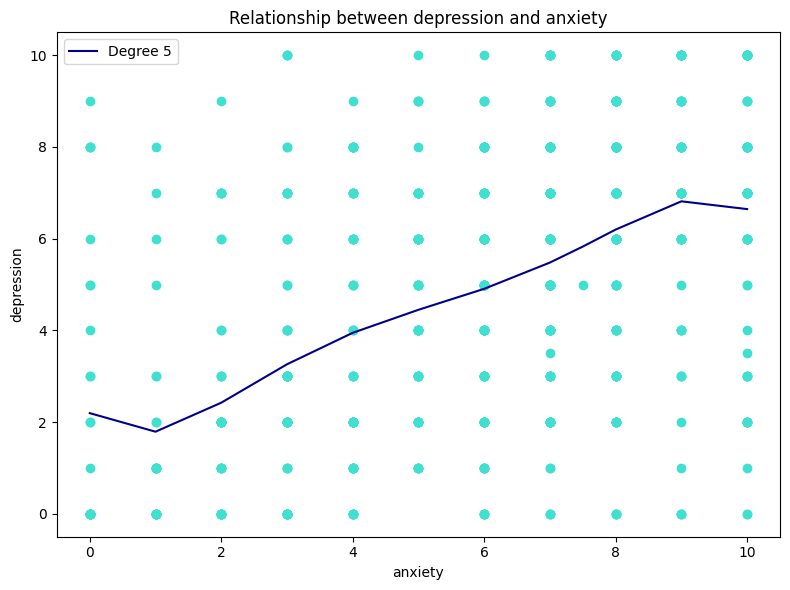

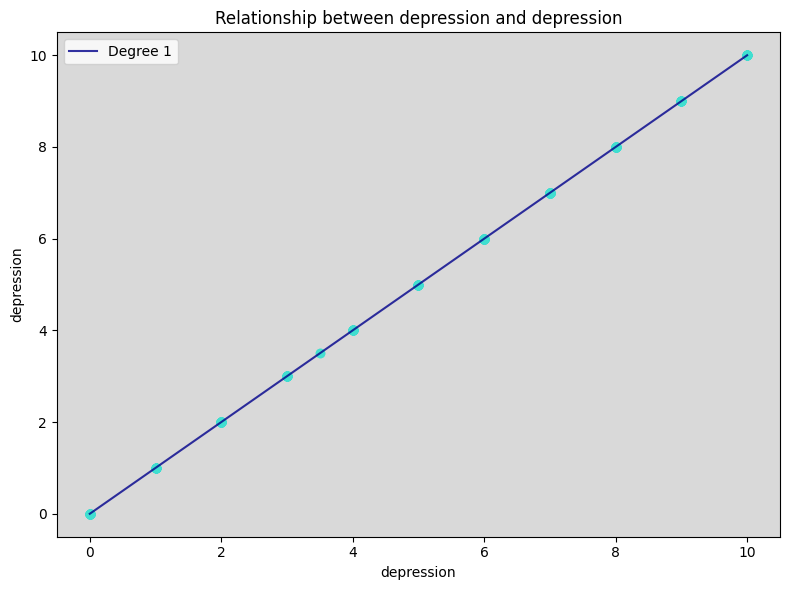

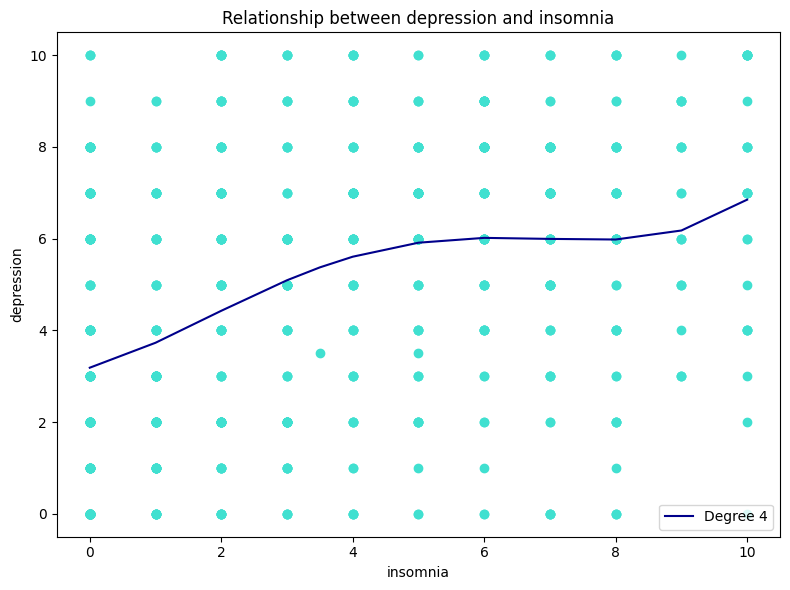

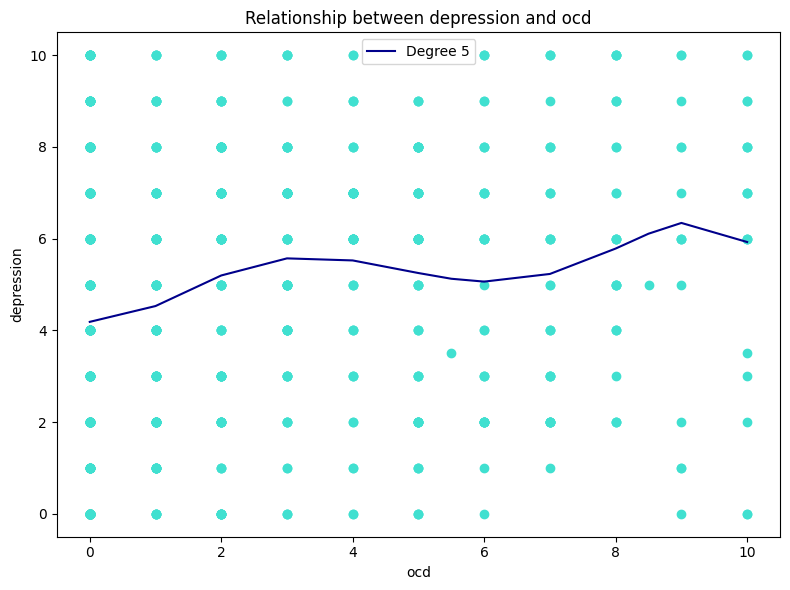

In [155]:
os.makedirs("Images", exist_ok=True)

variables_numericas = X_num.columns

semi_light_grey = (0.85, 0.85, 0.85)  

for var in variables_numericas:
    # Get data
    x = X_num[var].values.reshape(-1, 1)
    y = X_num['depression'].values
    
    best_degree = 1
    best_r2_adj = 0
    
    for grado in range(1, 6):
        poly_features = PolynomialFeatures(degree=grado)
        x_poly = poly_features.fit_transform(x)
        
        model = LinearRegression()
        model.fit(x_poly, y)
        
        y_pred = model.predict(x_poly)
        r2 = r2_score(y, y_pred)
        
        n = len(y)
        r2_adj = 1 - (1 - r2) * (n - 1) / (n - grado - 1)
        
        if r2_adj > best_r2_adj:
            best_r2_adj = r2_adj
            best_degree = grado
    
    poly_features = PolynomialFeatures(degree=best_degree)
    x_poly = poly_features.fit_transform(x)
    model = LinearRegression()
    model.fit(x_poly, y)
    
    y_pred = model.predict(x_poly)
    
    sort_axis = np.argsort(x.flatten())
    
    plt.figure(figsize=(8, 6))
    
    if var == 'depression':
        plt.scatter(x, y, color='turquoise', alpha=0.8)  
        plt.plot(x[sort_axis], y_pred[sort_axis], color='darkblue', label=f'Degree {best_degree}', alpha=0.8)  
        plt.gca().set_facecolor(semi_light_grey)  
    else:
        plt.scatter(x, y, color='turquoise')  
        plt.plot(x[sort_axis], y_pred[sort_axis], color='darkblue', label=f'Degree {best_degree}')  
    
    plt.title(f'Relationship between depression and {var}')
    plt.xlabel(var)
    plt.ylabel('depression')
    plt.legend()
    
    plt.tight_layout()
    
    plt.savefig(os.path.join("Images", f'scatter_{var}.png'), bbox_inches='tight')
    
    plt.show()
    
    plt.close()


Ahora pasamos a la siguiente parte del proyecto: análisis temporal

## Time Series Analysis

La siguiente parte de la consigna era hacer un análisis de Series de Tiempo. Se eligió otro dataset pues el anterior no funcionaba para un análisis temporal (la columna timestamp no tenía ninguna aplicación relevante). Este dataset trata sobre Spotify.

Se quiere analizar cómo varía la cantidad de streams (cantidad de reproducciones de la canción en cuestión) con el paso del tiempo.
Dado que el dataframe del modelo anterior era de fines del 2022, se decidió "recortar" este DataFrame (con filtros en Excel) para que estén referidos al mismo período y puedan ser comparados. A su vez, el dataframe de Spotify tiene más de 1 millon de filas, lo cual hace que el Prophet ande lento pero igualmente luego se lo incluyó y se le hizo un análisis en chunks para acelerar el proceso.

In [156]:
sp=pd.read_excel('Data/cortito.xlsx') 
#Este dataframe solo contiene fechas en el mismo rango que el dataframe music.
#El que se llama spotify es el original (contiene datos referidos a varios años).
sp.head()

,date,country,position,streams,track_id,artists,artist_genres,duration,explicit,name,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,2022-11-10,eg,40,65943,5NcTOxzo2WE20tFdtUhbAM,['Marwan Pablo'],"['egyptian trap', 'egyptian hip hop']",156501,False,BARBARY,NaN,NaN,NaN,NaN,1.260000e+07
1,2022-11-10,sg,178,52838,0YgvF6fNWydNGzCY3pzK4Y,['JJ Lin'],"['mandopop', 'singaporean mandopop', 'singapor...",265000,False,æ±Ÿå—,NaN,NaN,2.373277,NaN,4.754717e+01
2,2022-11-10,au,169,280161,0nrRP2bk19rLc0orkWPQk2,['Avicii'],"['pop rap', 'pop', 'pop dance', 'dance pop', '...",247426,False,Wake Me Up,NaN,NaN,NaN,NaN,NaN
3,2022-11-10,be,182,59603,0nrRP2bk19rLc0orkWPQk2,['Avicii'],"['pop rap', 'pop', 'pop dance', 'dance pop', '...",247426,False,Wake Me Up,NaN,NaN,NaN,NaN,NaN
4,2022-11-10,ie,184,46016,0nrRP2bk19rLc0orkWPQk2,['Avicii'],"['pop rap', 'pop', 'pop dance', 'dance pop', '...",247426,False,Wake Me Up,NaN,NaN,NaN,NaN,NaN


In [157]:
sp.columns

Index(['date', 'country', 'position', 'streams', 'track_id', 'artists',
       'artist_genres', 'duration', 'explicit', 'name', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14'],
      dtype='object')

In [158]:
def remove_unnamed_columns(df):
    unnamed_columns = [col for col in df.columns if col.startswith('Unnamed:') and int(col.split(':')[1]) >= 10 and int(col.split(':')[1]) <= 14]
    df = df.drop(columns=unnamed_columns, errors='ignore')
    return df

sp = remove_unnamed_columns(sp)

In [159]:
sp.columns

Index(['date', 'country', 'position', 'streams', 'track_id', 'artists',
       'artist_genres', 'duration', 'explicit', 'name'],
      dtype='object')

In [160]:
sp.isna().sum()

date             0
country          0
position         0
streams          0
track_id         0
artists          0
artist_genres    0
duration         0
explicit         0
name             3
dtype: int64

In [161]:
sp.head()

,date,country,position,streams,track_id,artists,artist_genres,duration,explicit,name
0,2022-11-10,eg,40,65943,5NcTOxzo2WE20tFdtUhbAM,['Marwan Pablo'],"['egyptian trap', 'egyptian hip hop']",156501,False,BARBARY
1,2022-11-10,sg,178,52838,0YgvF6fNWydNGzCY3pzK4Y,['JJ Lin'],"['mandopop', 'singaporean mandopop', 'singapor...",265000,False,æ±Ÿå—
2,2022-11-10,au,169,280161,0nrRP2bk19rLc0orkWPQk2,['Avicii'],"['pop rap', 'pop', 'pop dance', 'dance pop', '...",247426,False,Wake Me Up
3,2022-11-10,be,182,59603,0nrRP2bk19rLc0orkWPQk2,['Avicii'],"['pop rap', 'pop', 'pop dance', 'dance pop', '...",247426,False,Wake Me Up
4,2022-11-10,ie,184,46016,0nrRP2bk19rLc0orkWPQk2,['Avicii'],"['pop rap', 'pop', 'pop dance', 'dance pop', '...",247426,False,Wake Me Up


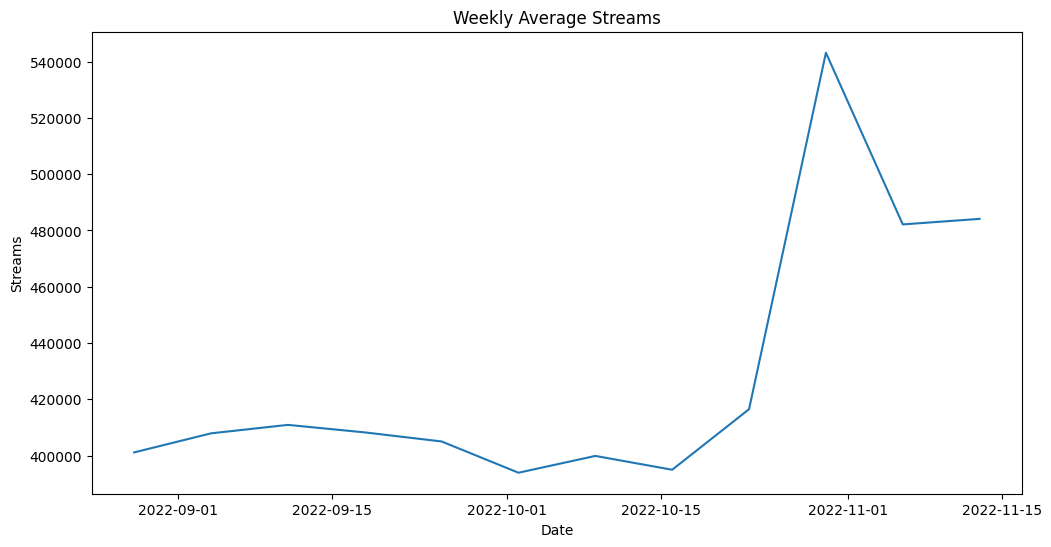

13:22:21 - cmdstanpy - INFO - Chain [1] start processing
13:22:24 - cmdstanpy - INFO - Chain [1] done processing


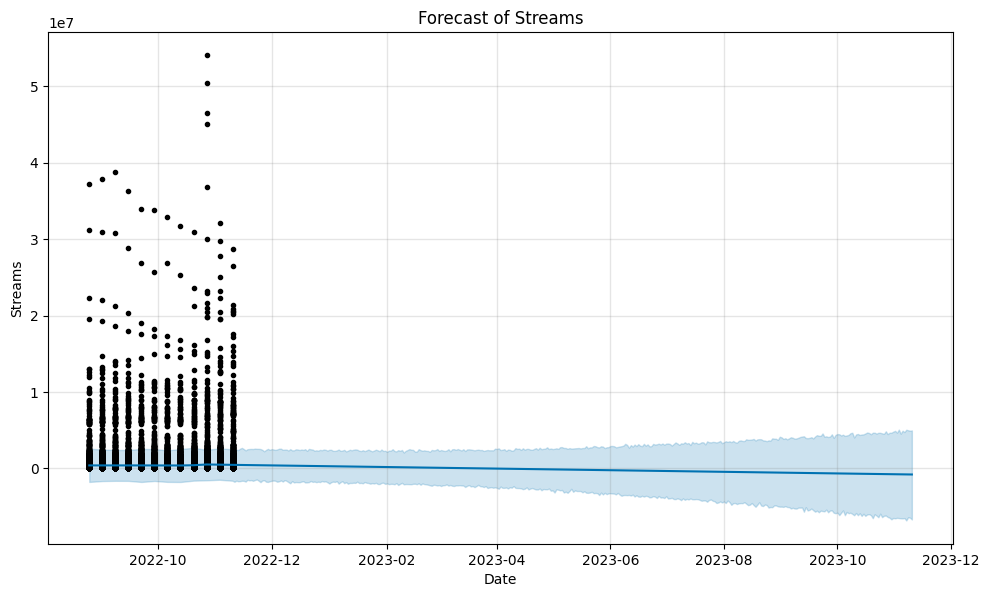

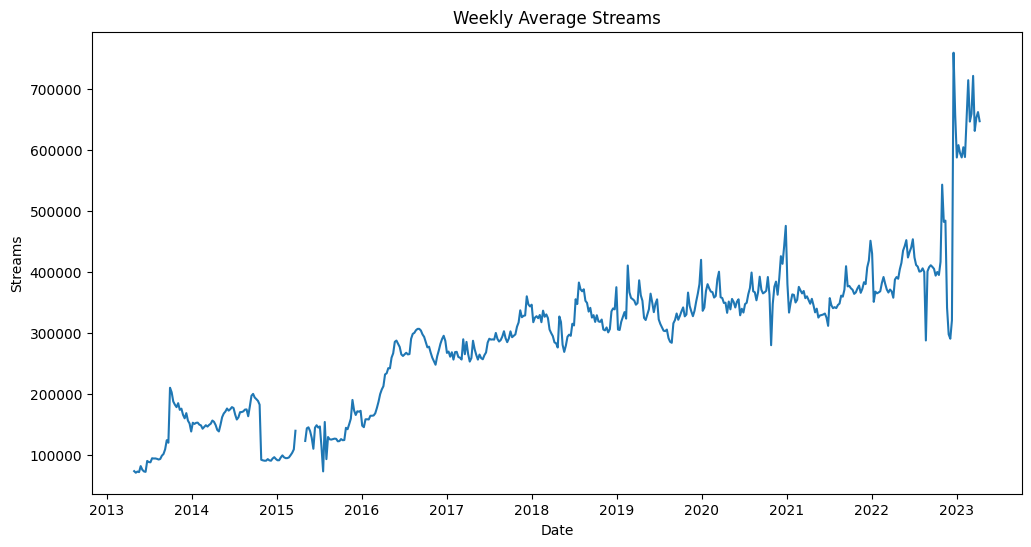

13:23:46 - cmdstanpy - INFO - Chain [1] start processing
13:25:24 - cmdstanpy - INFO - Chain [1] done processing


In [162]:
sp = pd.read_excel('Data/cortito.xlsx')

def remove_unnamed_columns(df):
    unnamed_columns = [col for col in df.columns if col.startswith('Unnamed:') and int(col.split(':')[1]) >= 10 and int(col.split(':')[1]) <= 14]
    df = df.drop(columns=unnamed_columns, errors='ignore')
    return df

sp = remove_unnamed_columns(sp)

sp.dropna(subset=['name'], inplace=True)

sp['date'] = pd.to_datetime(sp['date'])
sp_indexed = sp.set_index('date')
weekly_data = sp_indexed['streams'].resample('W').mean()

plt.figure(figsize=(12, 6))
plt.plot(weekly_data)
plt.title('Weekly Average Streams')
plt.xlabel('Date')
plt.ylabel('Streams')
plt.show()

sp = sp[['date', 'streams']]
sp.rename(columns={'date': 'ds', 'streams': 'y'}, inplace=True)

m = Prophet()
m.fit(sp)

future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

fig1 = m.plot(forecast)
plt.title('Forecast of Streams')
plt.xlabel('Date')
plt.ylabel('Streams')
plt.savefig('Images/cortito.png')

plt.show()


def process_chunk(chunk):    
    chunk = chunk.loc[:, ~chunk.columns.str.contains('^Unnamed')]
    chunk.dropna(subset=['name'], inplace=True)
    chunk['date'] = pd.to_datetime(chunk['date'])
    return chunk

chunksize = 10000  
chunk_list = []

for chunk in pd.read_csv('Data/spotify.csv', chunksize=chunksize):
    processed_chunk = process_chunk(chunk)
    chunk_list.append(processed_chunk)

spotify = pd.concat(chunk_list)

spotify.set_index('date', inplace=True)
weekly_data = spotify['streams'].resample('W').mean()

plt.figure(figsize=(12, 6))
plt.plot(weekly_data)
plt.title('Weekly Average Streams')
plt.xlabel('Date')
plt.ylabel('Streams')

plt.savefig('Images/total.png')

plt.show()

spotify.reset_index(inplace=True)
spotify = spotify[['date', 'streams']]
spotify.rename(columns={'date': 'ds', 'streams': 'y'}, inplace=True)

m = Prophet()
m.fit(spotify)

future = m.make_future_dataframe(periods=365)

forecast = m.predict(future)

Del Forecast se puede ver que se agranda un poco el abanico pero no demasiado. Es decir, el modelo tiene buena capacidad predictiva. A su vez, en la parte de la gráfica que tiene datos reales (no a futuro), la tendencia es bastante constante, lo cual también da confianza para predecir. 

En cambio en el último gráfico ya se ve una tendencia creciente. Tiene sentido porque aplicaciones como Spotify, etc, usan sistemas de recomendación de canciones que hacen que los usuarios pasen más tiempo dentro de las aplicaciones. Además, hoy en día los artistas aparecen en las redes sociales mucho más que en el 2013 por ejemplo (cuando comienza el período del dataset) lo cual hace que los fans puedan mantener interés en sus canciones.
Los avances en la tecnología hacen que las canciones puedan tener una mejor producción. También mejoran los dispositivos para escuchar música, como pueden ser los auriculares, que hacen que la gente sea más dependiente de escuchar música. 

Estos factores pueden generar adicción en las personas para escuchar música. Si bien se habló de horas escuchadas, efectos musicales, etc, no había ninguna variable específicamente referida a la adicción de los usuarios. Uno de los motivos por los cuales me interesó usar como target la variable de horas escuchadas por día es porque tener modelos de Machine Learning que puedan predecirla pueden ser muy útiles para sacar estadísticas ya que muchos jóvenes son adictos a escuchar música (y entre otras cosas se les puede perjudicar mucho la audición)